# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 8.372507e-10


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


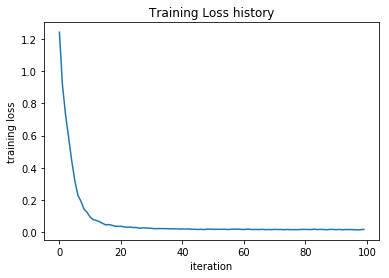

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1150, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.29, verbose=True)
"""stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1150, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.29, verbose=True)  -48.7%
"""

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1150: loss 2.303016
iteration 100 / 1150: loss 1.965447
iteration 200 / 1150: loss 1.753204
iteration 300 / 1150: loss 1.612364
iteration 400 / 1150: loss 1.729039
iteration 500 / 1150: loss 1.566817
iteration 600 / 1150: loss 1.649123
iteration 700 / 1150: loss 1.443901
iteration 800 / 1150: loss 1.480897
iteration 900 / 1150: loss 1.521378
iteration 1000 / 1150: loss 1.541563
iteration 1100 / 1150: loss 1.469597
Validation accuracy:  0.483


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

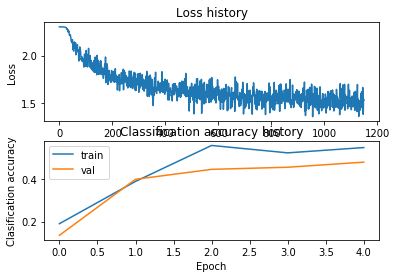

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

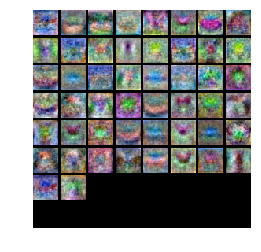

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [ ]:
best_net = None # store the best model into this 
import time
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
results = {}
best_val = -1
learning_rates = [1e-4, 5e-3]
regularization_strengths = [0.25, 0.35]
decay_rates = [0.05,1.0]

range_lern_rate = np.linspace(learning_rates[0],learning_rates[1],10)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],5)
range_decay =  np.linspace(decay_rates[0],decay_rates[1],3)


for i in range_lern_rate:
    for j in range_reg:
        for k in range_decay:
            nn = TwoLayerNet(input_size, hidden_size, num_classes)
            tic = time.time()
            loss_hist = nn.train(X_train, y_train, X_val,y_val,num_iters=1000, batch_size=500,learning_rate=i, learning_rate_decay=k,reg=j, verbose=True)
            toc = time.time()
            print('That took %fs' % (toc - tic))
            y_train_pred = nn.predict(X_train)
            train_accur = np.mean(y_train == y_train_pred)   
            y_val_pred = nn.predict(X_val)
            val_accur = np.mean(y_val == y_val_pred)
            results[(i, j)]=(train_accur, val_accur)
            print("loss hist", loss_hist)
            
            if val_accur>best_val:
                best_val = val_accur
                best_net = nn  

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
range_lern_rate = np.linspace(learning_rates[0],learning_rates[1],10)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],10)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 1000: loss 2.302966
iteration 100 / 1000: loss 2.302945
iteration 200 / 1000: loss 2.302942
iteration 300 / 1000: loss 2.302951
iteration 400 / 1000: loss 2.302953
iteration 500 / 1000: loss 2.302943
iteration 600 / 1000: loss 2.302947
iteration 700 / 1000: loss 2.302959
iteration 800 / 1000: loss 2.302946
iteration 900 / 1000: loss 2.302948
That took 21.646897s
loss hist {'loss_history': [2.3029658378291966, 2.3029660138781276, 2.302966699167618, 2.3029527284935583, 2.3029675086296444, 2.3029691173331126, 2.302952618454407, 2.3029684858280492, 2.3029570454412194, 2.3029633230711433, 2.302964337161875, 2.302970622918434, 2.302959608251624, 2.3029607981182005, 2.3029627061313316, 2.3029674653465153, 2.302960876952504, 2.302959130592407, 2.302962269092787, 2.302971275951924, 2.3029513019552894, 2.3029525155351878, 2.3029669810878732, 2.3029527386748154, 2.302970161257073, 2.302960357551877, 2.302970654558086, 2.3029589540058555, 2.30296258278018, 2.302954079070897, 2.302963

iteration 100 / 1000: loss 2.302790
iteration 200 / 1000: loss 2.302643
iteration 300 / 1000: loss 2.302487
iteration 400 / 1000: loss 2.302337
iteration 500 / 1000: loss 2.302357
iteration 600 / 1000: loss 2.302320
iteration 700 / 1000: loss 2.302175
iteration 800 / 1000: loss 2.302194
iteration 900 / 1000: loss 2.302153
That took 22.153406s
loss hist {'loss_history': [2.302969606290033, 2.302952074221567, 2.302976252779913, 2.3029565644769696, 2.3029459220617428, 2.302953017073609, 2.3029681046241417, 2.3029401610495834, 2.3029504300891563, 2.3029508254525424, 2.3029599572414523, 2.302948241727061, 2.302952305235888, 2.3029480356287353, 2.3029416802945426, 2.3029491642857907, 2.30293233004522, 2.302950836024556, 2.302933692840553, 2.3029315707791573, 2.3029425890820185, 2.3029389740449933, 2.3029367225636457, 2.3029357043995833, 2.302942218372725, 2.302922948924688, 2.3029298733844836, 2.302925357944051, 2.3029313084573944, 2.3029255468444956, 2.302916413788398, 2.3029140584340775, 2

iteration 100 / 1000: loss 2.302330
iteration 200 / 1000: loss 2.296690
iteration 300 / 1000: loss 2.238849
iteration 400 / 1000: loss 2.151837
iteration 500 / 1000: loss 2.105642
iteration 600 / 1000: loss 2.071285
iteration 700 / 1000: loss 1.993746
iteration 800 / 1000: loss 1.958363
iteration 900 / 1000: loss 1.949185
That took 20.489041s
loss hist {'loss_history': [2.3029705963610545, 2.3029748809389416, 2.302980723469079, 2.3029649900936837, 2.302970581416021, 2.3029585722711987, 2.30295438469098, 2.3029575561014397, 2.3029517125697585, 2.3029426756421087, 2.3029467019309986, 2.302927435921541, 2.3029571690569424, 2.302939307187962, 2.302938003081147, 2.302929156038478, 2.302929161129527, 2.302918893659709, 2.302931714418682, 2.302932395860264, 2.3029221265249995, 2.302924273529562, 2.302925357129873, 2.302906299163062, 2.3029150237104012, 2.302888262591318, 2.3029009353775693, 2.302903027264953, 2.302889352368452, 2.302885932501113, 2.3028985662815167, 2.302886869574868, 2.30289

iteration 100 / 1000: loss 2.303028
iteration 200 / 1000: loss 2.303023
iteration 300 / 1000: loss 2.303015
iteration 400 / 1000: loss 2.303030
iteration 500 / 1000: loss 2.303002
iteration 600 / 1000: loss 2.303020
iteration 700 / 1000: loss 2.303006
iteration 800 / 1000: loss 2.303026
iteration 900 / 1000: loss 2.302992
That took 21.333232s
loss hist {'loss_history': [2.3030328925238215, 2.3030247447340075, 2.303017042514071, 2.303025022634448, 2.303026442853527, 2.3030342513191817, 2.303021774554717, 2.303027454802076, 2.30303018058962, 2.3030277954005363, 2.3030235861576656, 2.3030224841390563, 2.3030324582222774, 2.303034856344443, 2.3030235004474666, 2.3030145511966382, 2.3030230523974766, 2.303028012295496, 2.303035457866142, 2.3030348819081796, 2.3030138691657154, 2.303027662856982, 2.3030273797242833, 2.303032845926848, 2.3030065253315435, 2.303023847071048, 2.3030307050032026, 2.303025127560489, 2.303029417330576, 2.3030265982508547, 2.303036954328736, 2.3030165273650316, 2.3

iteration 100 / 1000: loss 2.302813
iteration 200 / 1000: loss 2.302596
iteration 300 / 1000: loss 2.302346
iteration 400 / 1000: loss 2.302345
iteration 500 / 1000: loss 2.302334
iteration 600 / 1000: loss 2.302137
iteration 700 / 1000: loss 2.302140
iteration 800 / 1000: loss 2.302145
iteration 900 / 1000: loss 2.302147
That took 21.304277s
loss hist {'loss_history': [2.3029906558579927, 2.302993488558005, 2.302994680366665, 2.302998199543356, 2.3029813659810876, 2.3029853009399806, 2.302997791109707, 2.3029828668321533, 2.302992030894477, 2.302991269508843, 2.3029663625195487, 2.3029802018947154, 2.3029713180925597, 2.3029672482978127, 2.302973529001632, 2.3029804999469046, 2.30296750583749, 2.3029638265212173, 2.302954862734013, 2.3029704973490976, 2.3029664625843456, 2.3029625877135356, 2.3029693751439084, 2.302963250739004, 2.3029562381458555, 2.302960886292946, 2.3029436313838954, 2.302953833740169, 2.3029639486044013, 2.3029439052458596, 2.3029586416608985, 2.3029337733853996, 

iteration 100 / 1000: loss 2.302381
iteration 200 / 1000: loss 2.295041
iteration 300 / 1000: loss 2.240041
iteration 400 / 1000: loss 2.179674
iteration 500 / 1000: loss 2.072442
iteration 600 / 1000: loss 2.058549
iteration 700 / 1000: loss 1.991082
iteration 800 / 1000: loss 1.964289
iteration 900 / 1000: loss 1.962769
That took 22.200665s
loss hist {'loss_history': [2.303014180035945, 2.303021339605389, 2.3030159683370033, 2.303005620708244, 2.303014488280948, 2.3030055096590605, 2.302998069098168, 2.302997940869143, 2.303004041588199, 2.30299913005919, 2.3029824068921476, 2.3029940826287616, 2.302982979012776, 2.3029831809154313, 2.3029778267954373, 2.3029697762954684, 2.3029627727102766, 2.3029567228178713, 2.3029685234462125, 2.302977842283433, 2.3029646496687066, 2.302971468717811, 2.3029435156813407, 2.3029721107522723, 2.3029419482652274, 2.3029449474541765, 2.302954661621256, 2.3029384670856325, 2.302925366392371, 2.3029263553790558, 2.3029571380459073, 2.3029146424086404, 2

iteration 100 / 1000: loss 2.303019
iteration 200 / 1000: loss 2.303030
iteration 300 / 1000: loss 2.303019
iteration 400 / 1000: loss 2.303021
iteration 500 / 1000: loss 2.303013
iteration 600 / 1000: loss 2.303025
iteration 700 / 1000: loss 2.303021
iteration 800 / 1000: loss 2.303021
iteration 900 / 1000: loss 2.303018
That took 22.149909s
loss hist {'loss_history': [2.303051904479054, 2.303028533621824, 2.303046468992023, 2.3030300861603985, 2.303036997936802, 2.303023734839412, 2.303033251584367, 2.30302847197883, 2.3030276145371427, 2.303033993782672, 2.303025997383931, 2.3030401842328323, 2.303038327383121, 2.303029433852186, 2.30303548661069, 2.303034722182879, 2.303033131657622, 2.3030173843563393, 2.30302365880641, 2.3030279654959314, 2.303029399475764, 2.3030269274362167, 2.3030416278961656, 2.303022598929172, 2.3030226925480664, 2.3030264749813414, 2.3030304799611834, 2.3030246401047627, 2.3030239910864307, 2.3030225865377725, 2.3030097441509474, 2.3030302995873972, 2.30303

iteration 100 / 1000: loss 2.302909
iteration 200 / 1000: loss 2.302774
iteration 300 / 1000: loss 2.302648
iteration 400 / 1000: loss 2.302635
iteration 500 / 1000: loss 2.302580
iteration 600 / 1000: loss 2.302694
iteration 700 / 1000: loss 2.302484
iteration 800 / 1000: loss 2.302445
iteration 900 / 1000: loss 2.302476
That took 20.077099s
loss hist {'loss_history': [2.3030369338614407, 2.303021763228516, 2.3030472703266778, 2.3030271679690877, 2.303051041714801, 2.303035451903498, 2.3030271845589967, 2.303028798573726, 2.303026012732497, 2.3030218195130874, 2.303030141267651, 2.3030355496520505, 2.3030282115235856, 2.303023392855893, 2.3030347659281696, 2.303020599269853, 2.3030310799904763, 2.3030233075515865, 2.3030108711794104, 2.303023820891311, 2.303016900566172, 2.303018704677559, 2.3030252684530135, 2.30302211138087, 2.3030172928270694, 2.3030106529343937, 2.30302258860488, 2.303010714852417, 2.3030120536242755, 2.3030078758224715, 2.3030071135480146, 2.3030152071569083, 2.3

iteration 100 / 1000: loss 2.302510
iteration 200 / 1000: loss 2.297116
iteration 300 / 1000: loss 2.247712
iteration 400 / 1000: loss 2.182004
iteration 500 / 1000: loss 2.119160
iteration 600 / 1000: loss 2.050460
iteration 700 / 1000: loss 2.008976
iteration 800 / 1000: loss 1.966966
iteration 900 / 1000: loss 1.974088
That took 20.396178s
loss hist {'loss_history': [2.3030412308382826, 2.303051872159966, 2.3030417878201783, 2.3030190668436243, 2.3030214237733353, 2.30302030169048, 2.3030373434284304, 2.3030374102690057, 2.3030373557965453, 2.303015924282748, 2.3030171855467247, 2.303029627742837, 2.3030093232788214, 2.303010779685716, 2.3030051322992633, 2.303005913449434, 2.3030132736461497, 2.3030022844738816, 2.3029841458370814, 2.3029886176668186, 2.3029959684400736, 2.303003220364842, 2.302991455347006, 2.3029899193792844, 2.3029804877780573, 2.3029915298538968, 2.302987650401153, 2.302985757779017, 2.3029481666526146, 2.302988846514536, 2.302955432105964, 2.3029652898981468, 

iteration 100 / 1000: loss 2.303067
iteration 200 / 1000: loss 2.303056
iteration 300 / 1000: loss 2.303075
iteration 400 / 1000: loss 2.303057
iteration 500 / 1000: loss 2.303074
iteration 600 / 1000: loss 2.303086
iteration 700 / 1000: loss 2.303058
iteration 800 / 1000: loss 2.303069
iteration 900 / 1000: loss 2.303057
That took 21.542692s
loss hist {'loss_history': [2.3030672006150232, 2.3030862514192165, 2.3030733723363337, 2.303089648796305, 2.303097937631611, 2.3030786133853454, 2.3030828830560224, 2.3030836336799094, 2.303084706399874, 2.3030733920360302, 2.303081729384794, 2.303085730115145, 2.3030750111623046, 2.3030745993490296, 2.303076587429637, 2.303079486902207, 2.303075026684367, 2.3030710630170237, 2.3030701103057702, 2.3030794103986842, 2.3030811302180743, 2.3030976864206725, 2.303081254475511, 2.303097546194744, 2.303077830832822, 2.3030808114491252, 2.303067502155202, 2.303083632654432, 2.303069769478584, 2.3030800761977575, 2.3030707410258158, 2.3030764654236555, 2

iteration 100 / 1000: loss 2.302938
iteration 200 / 1000: loss 2.302781
iteration 300 / 1000: loss 2.302785
iteration 400 / 1000: loss 2.302610
iteration 500 / 1000: loss 2.302545
iteration 600 / 1000: loss 2.302646
iteration 700 / 1000: loss 2.302587
iteration 800 / 1000: loss 2.302546
iteration 900 / 1000: loss 2.302582
That took 20.661976s
loss hist {'loss_history': [2.3030960412969605, 2.3030890612253847, 2.303087268801047, 2.303090613442167, 2.3030803534463082, 2.3030798783633433, 2.3030700114306097, 2.3030781034008125, 2.3030697097682933, 2.3030721785418895, 2.3030719422972084, 2.3030775324689334, 2.3030911795548006, 2.3030598704055905, 2.303070404189039, 2.3030734797676744, 2.303066432201076, 2.3030703413326634, 2.3030739162226843, 2.303061455027204, 2.3030680429212405, 2.303064289294498, 2.3030662731085783, 2.303042902391991, 2.3030555193796243, 2.303069921662387, 2.303057440472608, 2.303043040324116, 2.3030733655058353, 2.303060547556322, 2.303066514931009, 2.3030570870786296,

iteration 100 / 1000: loss 2.302340
iteration 200 / 1000: loss 2.294447
iteration 300 / 1000: loss 2.231533
iteration 400 / 1000: loss 2.146493
iteration 500 / 1000: loss 2.102795
iteration 600 / 1000: loss 2.109137
iteration 700 / 1000: loss 2.002525
iteration 800 / 1000: loss 1.954949
iteration 900 / 1000: loss 1.945247
That took 21.475082s
loss hist {'loss_history': [2.303077073764276, 2.3030751080311496, 2.3030686614861824, 2.303074738641758, 2.303076872545903, 2.303072739595266, 2.303049366793103, 2.303047925014484, 2.3030443308196675, 2.303042872852087, 2.303052868731621, 2.303042307316721, 2.303036634298755, 2.303037351493843, 2.3030364996943917, 2.303024509105786, 2.3030258603630998, 2.3030116124659763, 2.3030203630661736, 2.3030149883806446, 2.3030183690953274, 2.3030170415862345, 2.303001886659538, 2.30300988049725, 2.3029953631245537, 2.3030069682714913, 2.302982746810838, 2.3030156270805153, 2.3029979670196448, 2.302971709532207, 2.3029938352360966, 2.3029714306922067, 2.30

iteration 100 / 1000: loss 2.303114
iteration 200 / 1000: loss 2.303115
iteration 300 / 1000: loss 2.303119
iteration 400 / 1000: loss 2.303110
iteration 500 / 1000: loss 2.303131
iteration 600 / 1000: loss 2.303119
iteration 700 / 1000: loss 2.303135
iteration 800 / 1000: loss 2.303117
iteration 900 / 1000: loss 2.303103
That took 21.082285s
loss hist {'loss_history': [2.3031351371068745, 2.3031391240908166, 2.3031354866290306, 2.3031312757794735, 2.3031304792198988, 2.303145830840504, 2.303143070564642, 2.303124260194191, 2.303129198078913, 2.3031466535540037, 2.3031378326423573, 2.303141697427554, 2.3031297578910177, 2.3031582238148656, 2.3031349763694893, 2.3031464825450545, 2.3031343618762836, 2.303119573566002, 2.303146242132749, 2.3031301843384346, 2.303126360857643, 2.3031187069272177, 2.3031338450583756, 2.303139418873226, 2.303107971033297, 2.3031353113671247, 2.303145741189624, 2.30313407380638, 2.303135784022541, 2.3031399773747703, 2.3031140805902472, 2.303137530545292, 2.

iteration 100 / 1000: loss 2.302939
iteration 200 / 1000: loss 2.302790
iteration 300 / 1000: loss 2.302708
iteration 400 / 1000: loss 2.302539
iteration 500 / 1000: loss 2.302487
iteration 600 / 1000: loss 2.302390
iteration 700 / 1000: loss 2.302531
iteration 800 / 1000: loss 2.302410
iteration 900 / 1000: loss 2.302415
That took 21.286195s
loss hist {'loss_history': [2.303094530309352, 2.3031120788665516, 2.3031120881677345, 2.303112698317853, 2.303079699872067, 2.3031026198621016, 2.303104050610885, 2.3030988040144056, 2.303096913033155, 2.3031055329850387, 2.303087842215613, 2.3030805136304804, 2.3030885121779194, 2.303103283829189, 2.3030885413596622, 2.3030958517897386, 2.3030916626169033, 2.3030864377530103, 2.3030834975443986, 2.303070379040428, 2.303075605497686, 2.3030855592693835, 2.3030737296428057, 2.3030730181125723, 2.3030801870431863, 2.3030672532632557, 2.303059005211415, 2.3030627938328543, 2.303093426328534, 2.303076078222567, 2.303081634041469, 2.303066444455528, 2

iteration 100 / 1000: loss 2.302662
iteration 200 / 1000: loss 2.297611
iteration 300 / 1000: loss 2.253277
iteration 400 / 1000: loss 2.182684
iteration 500 / 1000: loss 2.115147
iteration 600 / 1000: loss 2.061316
iteration 700 / 1000: loss 2.020062
iteration 800 / 1000: loss 1.951555
iteration 900 / 1000: loss 2.017439
That took 21.360668s
loss hist {'loss_history': [2.303122950838799, 2.3031382187887135, 2.3031245800214113, 2.3031069412632856, 2.3031271245359424, 2.3031053846897866, 2.303107333327756, 2.3030992560412935, 2.3031046524505285, 2.303098306626251, 2.3031059342663505, 2.303099112980385, 2.3030916686229395, 2.303097146655385, 2.3030922720239593, 2.3030876740985597, 2.3030884644376686, 2.3030793037296653, 2.303078119040206, 2.3030722697521417, 2.3030806999708497, 2.303084654876899, 2.3030880058165883, 2.3030612552411975, 2.303066589933101, 2.3030657245201334, 2.303051933206139, 2.3030610331384844, 2.3030595974766426, 2.303047827351964, 2.303035101697037, 2.303044773149234,

iteration 100 / 1000: loss 2.302848
iteration 200 / 1000: loss 2.302846
iteration 300 / 1000: loss 2.302877
iteration 400 / 1000: loss 2.302865
iteration 500 / 1000: loss 2.302849
iteration 600 / 1000: loss 2.302872
iteration 700 / 1000: loss 2.302840
iteration 800 / 1000: loss 2.302860
iteration 900 / 1000: loss 2.302879
That took 22.354371s
loss hist {'loss_history': [2.302960046662769, 2.3029418843582667, 2.3029520386218203, 2.3029444011178684, 2.302924757772619, 2.302942801126829, 2.302944709939391, 2.3029481837223247, 2.3029320846403403, 2.302951607139076, 2.3029413060979933, 2.302940755542808, 2.302927855425059, 2.3029372927502143, 2.302935592016928, 2.302928773048209, 2.3029200942898966, 2.302929165877771, 2.3029415059234615, 2.30294399848128, 2.3029401368022357, 2.302934957152284, 2.3029324629100563, 2.302915395576832, 2.3029345979257334, 2.30294243273176, 2.3029337934108534, 2.302917118434591, 2.302919296505967, 2.3029311441782605, 2.302906406528782, 2.3029297106704973, 2.3029

iteration 100 / 1000: loss 2.201407
iteration 200 / 1000: loss 2.079617
iteration 300 / 1000: loss 2.052858
iteration 400 / 1000: loss 2.010044
iteration 500 / 1000: loss 2.018447
iteration 600 / 1000: loss 2.020550
iteration 700 / 1000: loss 1.985070
iteration 800 / 1000: loss 2.077179
iteration 900 / 1000: loss 1.998919
That took 21.022728s
loss hist {'loss_history': [2.3029616706729246, 2.302935911047777, 2.3029236948909952, 2.3029412585903373, 2.3029175609575563, 2.3029018822787024, 2.30289671943394, 2.30287849010122, 2.3028737879404955, 2.302876152610502, 2.3028311934545282, 2.3028183262576105, 2.3028207313813245, 2.302801315197303, 2.302778410351001, 2.3027885793884444, 2.302790852048171, 2.3027070676295582, 2.3027403092007286, 2.3026700093678123, 2.302617657996761, 2.3026315594247215, 2.302607577929575, 2.302562778510836, 2.302506657588902, 2.3025848908250484, 2.3023875679354195, 2.3025143458926287, 2.3024261584517243, 2.3023171692545725, 2.302224893794269, 2.302254340717483, 2.

iteration 100 / 1000: loss 2.092321
iteration 200 / 1000: loss 1.793919
iteration 300 / 1000: loss 1.749167
iteration 400 / 1000: loss 1.727371
iteration 500 / 1000: loss 1.683180
iteration 600 / 1000: loss 1.641077
iteration 700 / 1000: loss 1.579470
iteration 800 / 1000: loss 1.558291
iteration 900 / 1000: loss 1.463845
That took 21.566322s
loss hist {'loss_history': [2.3029868925419823, 2.3029767085551214, 2.3029806740222423, 2.302945339763992, 2.302938759914808, 2.302940227799819, 2.3029144603316722, 2.302894479665521, 2.3028703032015856, 2.3028743665239673, 2.302844527747346, 2.3028082746111416, 2.3027874170478806, 2.302744004382388, 2.302766435110749, 2.3026959697093257, 2.302642170429913, 2.3025797824003162, 2.302524070274412, 2.3025077452583425, 2.3022812730398843, 2.302253837527137, 2.302276552146844, 2.302100261791867, 2.3018722112339067, 2.301856544292402, 2.301445818341443, 2.30128619876312, 2.300964874797433, 2.300643615539363, 2.3005288415085476, 2.2999317859573116, 2.299

iteration 100 / 1000: loss 2.302912
iteration 200 / 1000: loss 2.302932
iteration 300 / 1000: loss 2.302906
iteration 400 / 1000: loss 2.302918
iteration 500 / 1000: loss 2.302910
iteration 600 / 1000: loss 2.302904
iteration 700 / 1000: loss 2.302915
iteration 800 / 1000: loss 2.302917
iteration 900 / 1000: loss 2.302911
That took 22.429152s
loss hist {'loss_history': [2.303012145665871, 2.303012224676302, 2.3030182529329166, 2.3030086116704096, 2.3030089252738333, 2.3030186633175678, 2.3029862740422717, 2.3030188436308054, 2.3030142251973484, 2.3029895753236485, 2.303008641196246, 2.3030082335206847, 2.302991679965983, 2.3029916627897866, 2.3029988388580573, 2.3029908497964025, 2.3029986108763936, 2.3029962534486548, 2.3029930635599873, 2.3029851581480965, 2.302984248950749, 2.3029749878495234, 2.3029991905383103, 2.3029943060124913, 2.302983592438599, 2.30298217329643, 2.3029918006823222, 2.302990271480893, 2.3029855007333206, 2.3030022950734454, 2.3029892311501485, 2.30298866127719

iteration 100 / 1000: loss 2.229317
iteration 200 / 1000: loss 2.087698
iteration 300 / 1000: loss 2.058573
iteration 400 / 1000: loss 2.008300
iteration 500 / 1000: loss 1.975959
iteration 600 / 1000: loss 2.017459
iteration 700 / 1000: loss 1.966822
iteration 800 / 1000: loss 2.011467
iteration 900 / 1000: loss 2.042135
That took 20.911484s
loss hist {'loss_history': [2.302994935419393, 2.302969979564426, 2.302971525144832, 2.302951472646527, 2.302958575821614, 2.3029365668678343, 2.302946252852543, 2.302927043887303, 2.3029045705718922, 2.3028926400779013, 2.3028807019805346, 2.3028850493766124, 2.3028650379362103, 2.3028398880511216, 2.3028274645766595, 2.3028296590999453, 2.3028117855960546, 2.30276016031884, 2.302772371618744, 2.3027420345611347, 2.302700165979064, 2.3027063887197876, 2.3026796603428132, 2.3026427066388218, 2.302659687578045, 2.302590457179408, 2.302507368893631, 2.302554003846894, 2.3024764603973495, 2.302421110143578, 2.302438623724516, 2.302292311999337, 2.302

iteration 0 / 1000: loss 2.303020
iteration 100 / 1000: loss 2.022360
iteration 200 / 1000: loss 1.873914
iteration 300 / 1000: loss 1.765504
iteration 400 / 1000: loss 1.679635
iteration 500 / 1000: loss 1.661168
iteration 600 / 1000: loss 1.675106
iteration 700 / 1000: loss 1.595852
iteration 800 / 1000: loss 1.554833
iteration 900 / 1000: loss 1.550871
That took 19.992985s
loss hist {'loss_history': [2.3030198007537206, 2.303000915618158, 2.302986565151815, 2.3029642866153943, 2.3029472928038737, 2.3029400136048084, 2.3029165232474487, 2.302879155394855, 2.3028473314288216, 2.302822933617749, 2.3027731699570775, 2.3027716498304796, 2.3027220383853217, 2.302707499877348, 2.3026324273352894, 2.3025878860073963, 2.3024737198792873, 2.302407509885882, 2.302301998604356, 2.302147948003666, 2.3020006926595884, 2.3020610314096492, 2.3017388080762524, 2.301632473599022, 2.301417255328991, 2.30116933275331, 2.3007535853699044, 2.3003859794824577, 2.3000445092468254, 2.2990017222472243, 2.298

iteration 100 / 1000: loss 2.302975
iteration 200 / 1000: loss 2.302965
iteration 300 / 1000: loss 2.302975
iteration 400 / 1000: loss 2.302979
iteration 500 / 1000: loss 2.302967
iteration 600 / 1000: loss 2.302961
iteration 700 / 1000: loss 2.302958
iteration 800 / 1000: loss 2.302982
iteration 900 / 1000: loss 2.302980
That took 21.132923s
loss hist {'loss_history': [2.3030692501240226, 2.3030393691474003, 2.303044407491942, 2.3030404689118757, 2.3030403382512286, 2.3030395429052657, 2.3030373631063825, 2.3030389930024024, 2.3030321801243154, 2.3030382483884844, 2.303041912900806, 2.3030161053735942, 2.3030386628063724, 2.3030401619555003, 2.3030406575319398, 2.3030362182603, 2.3030269978710813, 2.303029564308554, 2.3030204916258294, 2.303032513176299, 2.3030421643433465, 2.303028357678903, 2.3030344864315158, 2.3030297349254196, 2.3030112530305207, 2.303029489628016, 2.3030259107909683, 2.303011994921753, 2.3030207866677306, 2.3030223770061755, 2.3030195495892185, 2.303029113421111

iteration 100 / 1000: loss 2.219562
iteration 200 / 1000: loss 2.085909
iteration 300 / 1000: loss 2.063087
iteration 400 / 1000: loss 2.045373
iteration 500 / 1000: loss 2.033340
iteration 600 / 1000: loss 2.035153
iteration 700 / 1000: loss 2.014246
iteration 800 / 1000: loss 2.008095
iteration 900 / 1000: loss 2.034382
That took 20.125892s
loss hist {'loss_history': [2.303039501458002, 2.303016871879868, 2.3030131205283126, 2.3030133897388754, 2.3029821738204075, 2.302980480964294, 2.3029755099639906, 2.3029659823833506, 2.3029601365063637, 2.302946610247193, 2.302938210721251, 2.3029300209802313, 2.302895106045688, 2.3028647333183234, 2.30287177036234, 2.302871883516011, 2.3028327428273148, 2.302821075797554, 2.3028415358616634, 2.3028098259454213, 2.302774497895867, 2.302775729066862, 2.3026918848980418, 2.3027111894342975, 2.3026927372067063, 2.3026049166890736, 2.3026042688172925, 2.3025130438456918, 2.302478181126685, 2.3025716142134836, 2.302460132819169, 2.302329077229047, 2.

iteration 100 / 1000: loss 2.025024
iteration 200 / 1000: loss 1.852029
iteration 300 / 1000: loss 1.739327
iteration 400 / 1000: loss 1.812992
iteration 500 / 1000: loss 1.709097
iteration 600 / 1000: loss 1.621771
iteration 700 / 1000: loss 1.606995
iteration 800 / 1000: loss 1.605156
iteration 900 / 1000: loss 1.531519
That took 21.316448s
loss hist {'loss_history': [2.303061263869363, 2.3030435136245275, 2.3030270235312313, 2.303006320451759, 2.3029966591829885, 2.302975777676721, 2.302962588946964, 2.302947221848884, 2.3029384110728928, 2.3029132092034117, 2.3028681557994193, 2.302872041678142, 2.3027896994724233, 2.3027628683662655, 2.3027096270044813, 2.30264122799532, 2.302583617937821, 2.3025586075708393, 2.302510665130789, 2.302378394601402, 2.30223353557894, 2.30222911142538, 2.3020831904705887, 2.3016313804562363, 2.301647778205758, 2.3015713735649452, 2.301359789368285, 2.301117151513901, 2.3002785553760097, 2.2999047851117975, 2.3000411516599533, 2.298874825188034, 2.2985

iteration 100 / 1000: loss 2.302985
iteration 200 / 1000: loss 2.302968
iteration 300 / 1000: loss 2.302971
iteration 400 / 1000: loss 2.302985
iteration 500 / 1000: loss 2.302979
iteration 600 / 1000: loss 2.302993
iteration 700 / 1000: loss 2.302967
iteration 800 / 1000: loss 2.302984
iteration 900 / 1000: loss 2.302964
That took 21.259183s
loss hist {'loss_history': [2.30309671983748, 2.303068071887219, 2.303078048536593, 2.303063665303998, 2.3030524992661365, 2.303079455739489, 2.3030657371179393, 2.303070081271553, 2.3030724333301427, 2.303056948770216, 2.3030721014241915, 2.303058893811101, 2.3030634177759928, 2.3030592919785025, 2.3030580231011304, 2.3030548517772074, 2.3030688584375314, 2.3030439294091045, 2.3030480548826104, 2.3030464191726336, 2.303043926272971, 2.303067768937033, 2.303045562191985, 2.303040880944288, 2.3030460693386927, 2.303039158020182, 2.303042802463933, 2.303049427688017, 2.303059769891389, 2.303044387429175, 2.303051086502647, 2.3030546686202666, 2.3030

iteration 100 / 1000: loss 2.206698
iteration 200 / 1000: loss 2.061181
iteration 300 / 1000: loss 2.064242
iteration 400 / 1000: loss 2.022241
iteration 500 / 1000: loss 2.035996
iteration 600 / 1000: loss 2.025614
iteration 700 / 1000: loss 2.029396
iteration 800 / 1000: loss 2.013327
iteration 900 / 1000: loss 2.002294
That took 22.386514s
loss hist {'loss_history': [2.3030553700153344, 2.303046160180825, 2.303029081458351, 2.3030139298121766, 2.303023098837453, 2.3030080812154696, 2.302994921341042, 2.3029911789849735, 2.302958289464447, 2.3029299794094027, 2.3029422551468524, 2.302929013264284, 2.3028877998098287, 2.302898720015574, 2.302859040405785, 2.3028512187701704, 2.302829425089149, 2.302816392237883, 2.302775065955609, 2.302777391687326, 2.3027190118074627, 2.3027037048674197, 2.3026980682737785, 2.302581317810698, 2.3025858880102157, 2.3025520112627063, 2.3024954658404977, 2.302486558820768, 2.302498986677235, 2.3023059130040213, 2.302420572231668, 2.3020912113316623, 2.3

iteration 100 / 1000: loss 2.036935
iteration 200 / 1000: loss 1.902276
iteration 300 / 1000: loss 1.818263
iteration 400 / 1000: loss 1.722621
iteration 500 / 1000: loss 1.712966
iteration 600 / 1000: loss 1.651821
iteration 700 / 1000: loss 1.578151
iteration 800 / 1000: loss 1.563355
iteration 900 / 1000: loss 1.593558
That took 22.726887s
loss hist {'loss_history': [2.3030827170701573, 2.3030696226019574, 2.303081098405592, 2.3030361478111194, 2.303013832682733, 2.3030025057680374, 2.3029898984432817, 2.302961962115243, 2.3029403479661483, 2.30289963927973, 2.302876207246948, 2.302832458649078, 2.3027711271092683, 2.302740254333444, 2.302637488705844, 2.3026352840761737, 2.3024488844906297, 2.302396593276562, 2.3022835942062594, 2.3021191667453578, 2.30189106400482, 2.301816108781827, 2.3016613214687456, 2.3014326654652018, 2.3009025954499656, 2.300912816076306, 2.300261373115503, 2.299564599797051, 2.298588206103938, 2.298951304366915, 2.29798553919201, 2.2965653769754266, 2.29576

iteration 100 / 1000: loss 2.303047
iteration 200 / 1000: loss 2.303045
iteration 300 / 1000: loss 2.303051
iteration 400 / 1000: loss 2.303035
iteration 500 / 1000: loss 2.303051
iteration 600 / 1000: loss 2.303044
iteration 700 / 1000: loss 2.303042
iteration 800 / 1000: loss 2.303059
iteration 900 / 1000: loss 2.303052
That took 21.355491s
loss hist {'loss_history': [2.303132116372045, 2.3031322574361064, 2.3031251143517864, 2.303117619017829, 2.3031287798125346, 2.3031296882678047, 2.3031207838916834, 2.303132892603737, 2.3031272280920354, 2.3031273443773803, 2.303124567368177, 2.303115736431703, 2.3031275371067395, 2.3031095429375568, 2.3031145208725174, 2.3031188833851917, 2.3031223121722166, 2.303126615037932, 2.3031262426464982, 2.3031251748748014, 2.3031139681171977, 2.3031214118672065, 2.3031078960524676, 2.303110304006366, 2.3031204236799474, 2.3031243425854884, 2.3031067169841295, 2.3030982077036644, 2.3031044377016485, 2.3031073641420714, 2.3031104992153324, 2.303113144546

iteration 100 / 1000: loss 2.247510
iteration 200 / 1000: loss 2.099450
iteration 300 / 1000: loss 2.080538
iteration 400 / 1000: loss 2.092661
iteration 500 / 1000: loss 2.010329
iteration 600 / 1000: loss 2.053525
iteration 700 / 1000: loss 2.033714
iteration 800 / 1000: loss 2.038174
iteration 900 / 1000: loss 2.046773
That took 20.841223s
loss hist {'loss_history': [2.3031075095459195, 2.3031063334210997, 2.303100458157549, 2.303082964411237, 2.3030807976125076, 2.3030669388710403, 2.3030689169835736, 2.303061898055998, 2.3030461171405787, 2.303037341068046, 2.3030495907795236, 2.303028344817199, 2.303023794093914, 2.3030046873318955, 2.3029974659528287, 2.3029905991770114, 2.3029709361264215, 2.302955718638655, 2.3029583104664484, 2.30294940421338, 2.3029056061138453, 2.302885483859112, 2.302853763909553, 2.3028681040338785, 2.3028080031183586, 2.3028371255178786, 2.3027803975510857, 2.3027635601898457, 2.302729245559424, 2.3027177185432652, 2.302717445949156, 2.3025859678259626, 

iteration 100 / 1000: loss 2.054678
iteration 200 / 1000: loss 1.852958
iteration 300 / 1000: loss 1.780553
iteration 400 / 1000: loss 1.703939
iteration 500 / 1000: loss 1.687203
iteration 600 / 1000: loss 1.644754
iteration 700 / 1000: loss 1.599664
iteration 800 / 1000: loss 1.610781
iteration 900 / 1000: loss 1.609407
That took 21.776496s
loss hist {'loss_history': [2.3031318916086625, 2.3031299140677084, 2.3031191806744307, 2.303080329677263, 2.303082766795511, 2.3030683443386164, 2.3030276383669435, 2.3030206833320435, 2.302981996021049, 2.3029680901794674, 2.3029309812316523, 2.3028438216435436, 2.30284198987027, 2.302760449181772, 2.302712995171929, 2.30259516639233, 2.302527738779682, 2.3024433661398827, 2.3023540608664788, 2.3021934593524045, 2.3020831718462405, 2.3021009468450258, 2.3015826415326432, 2.3013455064426207, 2.3013979214161893, 2.3009283421126145, 2.3003993933260087, 2.300064908273413, 2.300243580092618, 2.298880412898753, 2.29855710238858, 2.29692991815945, 2.29

iteration 100 / 1000: loss 2.302660
iteration 200 / 1000: loss 2.302694
iteration 300 / 1000: loss 2.302664
iteration 400 / 1000: loss 2.302623
iteration 500 / 1000: loss 2.302626
iteration 600 / 1000: loss 2.302634
iteration 700 / 1000: loss 2.302622
iteration 800 / 1000: loss 2.302693
iteration 900 / 1000: loss 2.302661
That took 21.309793s
loss hist {'loss_history': [2.3029705206786013, 2.3029199467215644, 2.30291522944617, 2.302937771420437, 2.30292359730528, 2.3029272322257484, 2.302910310606006, 2.3029251553243832, 2.302903320026379, 2.3028901820554886, 2.3029071684889613, 2.3029142919377703, 2.3029089390323056, 2.3029150142117736, 2.3029114532816846, 2.3029119553629696, 2.3028957459473594, 2.3028889441877887, 2.3028882323456945, 2.302892827381325, 2.302894665007482, 2.3028708496744246, 2.3028915248261335, 2.3028904488777253, 2.3028838461799443, 2.302885526792191, 2.302899753825802, 2.3028764257187495, 2.3028859436022144, 2.302882501345038, 2.302856900475605, 2.3028690210316296, 

iteration 100 / 1000: loss 2.028972
iteration 200 / 1000: loss 1.902266
iteration 300 / 1000: loss 1.889867
iteration 400 / 1000: loss 1.856697
iteration 500 / 1000: loss 1.854638
iteration 600 / 1000: loss 1.823550
iteration 700 / 1000: loss 1.789001
iteration 800 / 1000: loss 1.897871
iteration 900 / 1000: loss 1.836951
That took 21.697953s
loss hist {'loss_history': [2.302982941425856, 2.30292995926509, 2.3029343005191287, 2.3029117826733043, 2.3028956437300594, 2.3028804368159213, 2.302870824656969, 2.302845781034168, 2.3028102667775014, 2.302791984013327, 2.302758726278687, 2.3027385786379453, 2.302733529003277, 2.3026721698918577, 2.3025632620426726, 2.3025417820272547, 2.3025093917193993, 2.30241156473344, 2.302450465204628, 2.3022571377293515, 2.3021496162765893, 2.3020346815751416, 2.301955950129783, 2.30177511951444, 2.3018672543513694, 2.3014634381144403, 2.301117651052466, 2.300755656538548, 2.3010671736727244, 2.29991271674011, 2.30012889665359, 2.299299441192913, 2.298745

iteration 100 / 1000: loss 1.938310
iteration 200 / 1000: loss 1.750967
iteration 300 / 1000: loss 1.648215
iteration 400 / 1000: loss 1.615128
iteration 500 / 1000: loss 1.532169
iteration 600 / 1000: loss 1.529166
iteration 700 / 1000: loss 1.462724
iteration 800 / 1000: loss 1.516861
iteration 900 / 1000: loss 1.501352
That took 22.622281s
loss hist {'loss_history': [2.3029581194436304, 2.302920538352699, 2.302885156208937, 2.30283907974884, 2.3028546140130643, 2.3027604923435354, 2.3026466934659036, 2.302595704348166, 2.302421590818395, 2.3024074604055262, 2.3020563208147173, 2.302013557136796, 2.3014426786194995, 2.3008043440141717, 2.300759029055392, 2.2993793181981443, 2.297924011848054, 2.29661738077638, 2.2952217582488177, 2.293740722105183, 2.2881556168325154, 2.2866838013536137, 2.2831474269847822, 2.279472626393042, 2.2691493034880743, 2.2602886566126266, 2.255305743059875, 2.241991701293319, 2.259622881403135, 2.2339388900749544, 2.224173127402702, 2.2061263927050674, 2.20

iteration 100 / 1000: loss 2.302701
iteration 200 / 1000: loss 2.302674
iteration 300 / 1000: loss 2.302678
iteration 400 / 1000: loss 2.302688
iteration 500 / 1000: loss 2.302655
iteration 600 / 1000: loss 2.302629
iteration 700 / 1000: loss 2.302639
iteration 800 / 1000: loss 2.302680
iteration 900 / 1000: loss 2.302676
That took 21.916891s
loss hist {'loss_history': [2.303019762263788, 2.302979956172552, 2.302965645575676, 2.3029636167486975, 2.3029715253192173, 2.3029505208263674, 2.3029566289441274, 2.302973071078371, 2.3029710029266695, 2.3029638922438425, 2.302967945516715, 2.302956583940227, 2.302973549384604, 2.302961860777552, 2.302956847830707, 2.302943236867857, 2.302936000468232, 2.3029327735615364, 2.302937333288311, 2.302928459262196, 2.3029236041457617, 2.3029269390848914, 2.3029408862336807, 2.3029230309314443, 2.302949365423608, 2.302903612130832, 2.302931761393893, 2.30291868314359, 2.302914487389963, 2.3029130521788854, 2.3029241467307267, 2.302909784317386, 2.30289

iteration 100 / 1000: loss 2.032331
iteration 200 / 1000: loss 1.970374
iteration 300 / 1000: loss 1.891098
iteration 400 / 1000: loss 1.854845
iteration 500 / 1000: loss 1.803977
iteration 600 / 1000: loss 1.822105
iteration 700 / 1000: loss 1.861754
iteration 800 / 1000: loss 1.866450
iteration 900 / 1000: loss 1.859384
That took 20.463934s
loss hist {'loss_history': [2.3030006606956945, 2.3029727107317965, 2.3029572655398636, 2.3029458093463107, 2.3029183872862338, 2.3029166010908835, 2.3028857679299306, 2.302872551551309, 2.3028097387492514, 2.302780201326332, 2.3027403875407253, 2.302703329386255, 2.302719764229328, 2.3025806175089616, 2.302509071131139, 2.302386586438802, 2.302257154527828, 2.3022417639365087, 2.3020279436400406, 2.301869063601369, 2.3019230595553006, 2.301818782906864, 2.301402561955815, 2.3010092499801935, 2.301096511476499, 2.3008485405657173, 2.300253626145674, 2.2998046963130596, 2.298651438862779, 2.2986351577758777, 2.2979068943338774, 2.295789654890214, 2

iteration 100 / 1000: loss 1.925565
iteration 200 / 1000: loss 1.698236
iteration 300 / 1000: loss 1.613497
iteration 400 / 1000: loss 1.534730
iteration 500 / 1000: loss 1.484839
iteration 600 / 1000: loss 1.563447
iteration 700 / 1000: loss 1.457680
iteration 800 / 1000: loss 1.549869
iteration 900 / 1000: loss 1.517169
That took 19.848007s
loss hist {'loss_history': [2.3030265644315198, 2.302987897903294, 2.3029868127037947, 2.3029581457296056, 2.302928453439851, 2.302885580876078, 2.3028509641049597, 2.302805099032372, 2.302741504415346, 2.3026451436003725, 2.3024941947135655, 2.3022461014517335, 2.3022601514734236, 2.302021395602732, 2.301505809372018, 2.3010218791354684, 2.3003934622500224, 2.2991897471643274, 2.2974827325058, 2.296511734617525, 2.2940641448962764, 2.292129098176308, 2.2902674384626303, 2.2851261691220186, 2.2817882005509227, 2.2702287512637644, 2.26384741133974, 2.259348190894915, 2.2351855875176034, 2.2314354946234016, 2.2389104164876303, 2.2469358434989988, 2.

iteration 100 / 1000: loss 2.302818
iteration 200 / 1000: loss 2.302786
iteration 300 / 1000: loss 2.302770
iteration 400 / 1000: loss 2.302755
iteration 500 / 1000: loss 2.302724
iteration 600 / 1000: loss 2.302735
iteration 700 / 1000: loss 2.302716
iteration 800 / 1000: loss 2.302782
iteration 900 / 1000: loss 2.302817
That took 20.605363s
loss hist {'loss_history': [2.3030550764775364, 2.3030210030902163, 2.3030206351598865, 2.3030084262031347, 2.3030083325604176, 2.303011072165801, 2.303015172920043, 2.302996008182244, 2.3029974112835747, 2.3030200723724836, 2.3030039657349923, 2.302990375977426, 2.3029963914598315, 2.3030065608241337, 2.3030020984261736, 2.3030022243765087, 2.3029858302301145, 2.303001412167473, 2.3029850017485294, 2.303001640035925, 2.3029861628841886, 2.3029776161309528, 2.3029775852420604, 2.3029897685845566, 2.302985886324744, 2.30297188083585, 2.302997943822892, 2.302990045918056, 2.3029697032315193, 2.302983586504817, 2.3029521739212515, 2.3029622313421276,

iteration 100 / 1000: loss 2.034348
iteration 200 / 1000: loss 1.931634
iteration 300 / 1000: loss 1.960645
iteration 400 / 1000: loss 1.898094
iteration 500 / 1000: loss 1.861322
iteration 600 / 1000: loss 1.851117
iteration 700 / 1000: loss 1.860854
iteration 800 / 1000: loss 1.871309
iteration 900 / 1000: loss 1.828434
That took 21.283708s
loss hist {'loss_history': [2.3030480927515926, 2.303014006741561, 2.30300456393648, 2.3029921623857965, 2.3029864174097874, 2.302971143204027, 2.3029372104917027, 2.302921629464376, 2.3028797541280346, 2.302866574249719, 2.302820241138713, 2.3027813025629844, 2.3027624637946738, 2.3027004208157043, 2.3027101117710567, 2.3026000016094414, 2.302545565232829, 2.302479017665811, 2.302433454502982, 2.3023155309467893, 2.302021637412394, 2.3019301648278416, 2.3018234574453103, 2.3015399484722017, 2.301594370355183, 2.301004846878733, 2.300742078551058, 2.301171820582736, 2.3006005025608984, 2.299209284826247, 2.299087812575729, 2.2986474305590514, 2.29

iteration 100 / 1000: loss 1.835084
iteration 200 / 1000: loss 1.834027
iteration 300 / 1000: loss 1.640076
iteration 400 / 1000: loss 1.596605
iteration 500 / 1000: loss 1.556160
iteration 600 / 1000: loss 1.574793
iteration 700 / 1000: loss 1.550475
iteration 800 / 1000: loss 1.452904
iteration 900 / 1000: loss 1.590747
That took 21.086484s
loss hist {'loss_history': [2.303052191444778, 2.3030240195723826, 2.3030121255963008, 2.30297240517619, 2.302933857983069, 2.3028848078102837, 2.3028451750411474, 2.3027937865365358, 2.302729208115903, 2.302629229585217, 2.302577106772887, 2.3022611444095995, 2.3022698849692067, 2.3019119106065284, 2.3014296008148696, 2.3012384502721437, 2.3003110017160795, 2.2988626617782715, 2.297954380765449, 2.2964573087145914, 2.2951832659023506, 2.290882726741914, 2.289663943638495, 2.286836614721938, 2.2772170865126347, 2.272560136707846, 2.2701147807550677, 2.2494937740201477, 2.2512750754261814, 2.2376128792132817, 2.224439421478506, 2.226490144974415, 2

iteration 100 / 1000: loss 2.302742
iteration 200 / 1000: loss 2.302744
iteration 300 / 1000: loss 2.302787
iteration 400 / 1000: loss 2.302722
iteration 500 / 1000: loss 2.302761
iteration 600 / 1000: loss 2.302821
iteration 700 / 1000: loss 2.302804
iteration 800 / 1000: loss 2.302744
iteration 900 / 1000: loss 2.302768
That took 22.895290s
loss hist {'loss_history': [2.303071209161913, 2.3030314948082156, 2.3030203648582783, 2.3030346969796014, 2.303026353514945, 2.303039765050568, 2.30303269393038, 2.3030279613932825, 2.303016823883531, 2.3030347419578354, 2.303021132661972, 2.303018715480832, 2.3030401665652414, 2.303007688203452, 2.303034222787537, 2.30302391639285, 2.3030147382850514, 2.303012235333714, 2.3030336063476904, 2.303009179018049, 2.3029955591833753, 2.303000768745552, 2.30299604543639, 2.302987565501582, 2.3030175466299636, 2.303002880053036, 2.3029974062110297, 2.3029939402160866, 2.302994507697662, 2.3029956601222477, 2.3029870607271916, 2.3029867900987204, 2.30298

iteration 100 / 1000: loss 1.996531
iteration 200 / 1000: loss 1.953068
iteration 300 / 1000: loss 1.853940
iteration 400 / 1000: loss 1.933768
iteration 500 / 1000: loss 1.764501
iteration 600 / 1000: loss 1.910525
iteration 700 / 1000: loss 1.878235
iteration 800 / 1000: loss 1.811220
iteration 900 / 1000: loss 1.823167
That took 22.004946s
loss hist {'loss_history': [2.303084926846449, 2.303051076561236, 2.3030335768320875, 2.303020359217644, 2.302982105204214, 2.302948352627097, 2.302945600061002, 2.302879203282751, 2.3028628512896026, 2.3028562819471463, 2.3028555196093063, 2.3027711754427216, 2.3027225137366356, 2.302703793760667, 2.302667496687671, 2.3026402357495717, 2.3024483471407926, 2.3023476874707334, 2.3021735005481534, 2.3021732146319875, 2.3020938329230582, 2.301649558351672, 2.301440213565948, 2.301093041477653, 2.3012001920125345, 2.30094197534408, 2.2998407558748415, 2.2993753304076647, 2.2988605832769027, 2.297206336020972, 2.2972802823632867, 2.2967234165692094, 2.

iteration 100 / 1000: loss 1.903919
iteration 200 / 1000: loss 1.753021
iteration 300 / 1000: loss 1.719385
iteration 400 / 1000: loss 1.641616
iteration 500 / 1000: loss 1.627014
iteration 600 / 1000: loss 1.522491
iteration 700 / 1000: loss 1.558329
iteration 800 / 1000: loss 1.553425
iteration 900 / 1000: loss 1.436974
That took 22.498068s
loss hist {'loss_history': [2.303084545904677, 2.3030586590430735, 2.3030113725261376, 2.3029829029270648, 2.302956794724569, 2.3028918355613492, 2.3028918066550785, 2.302757367330398, 2.302711985308452, 2.3025570945990275, 2.3025078959832674, 2.302219074789601, 2.3021279711507896, 2.3017032158392987, 2.301187068837352, 2.3006343914312812, 2.3002162327634026, 2.2994509259072697, 2.2979698572156235, 2.2967278939970743, 2.2930425517574244, 2.2909666027898496, 2.28657036873127, 2.281479160207148, 2.2752820351553926, 2.2711288088094386, 2.259461100165214, 2.2495022117331906, 2.2421399395809027, 2.220909957598815, 2.236523339116761, 2.229280541780325, 

iteration 100 / 1000: loss 2.302920
iteration 200 / 1000: loss 2.302909
iteration 300 / 1000: loss 2.302871
iteration 400 / 1000: loss 2.302878
iteration 500 / 1000: loss 2.302890
iteration 600 / 1000: loss 2.302914
iteration 700 / 1000: loss 2.302919
iteration 800 / 1000: loss 2.302859
iteration 900 / 1000: loss 2.302893
That took 21.370873s
loss hist {'loss_history': [2.303129659995829, 2.303107945054282, 2.3031053584294128, 2.3031127250955876, 2.3031026503900773, 2.3031019785806683, 2.30309869771772, 2.3030812057275205, 2.3031007179371756, 2.303089998287168, 2.303102402007104, 2.3030892688335, 2.3031026875950684, 2.303086643798019, 2.3030909119178475, 2.3030943349652007, 2.3030912689661407, 2.303089854662332, 2.3030721509054186, 2.303067177467963, 2.3030861333161066, 2.3030911970828645, 2.3030862956524745, 2.303086283008371, 2.3030681255974583, 2.3030772613957726, 2.3030737960346395, 2.30307023837949, 2.3030539180470235, 2.3030767429433343, 2.30307574763851, 2.3030565715846327, 2.30

iteration 100 / 1000: loss 2.028626
iteration 200 / 1000: loss 1.938297
iteration 300 / 1000: loss 1.919792
iteration 400 / 1000: loss 1.829346
iteration 500 / 1000: loss 1.812427
iteration 600 / 1000: loss 1.871919
iteration 700 / 1000: loss 1.845377
iteration 800 / 1000: loss 1.863583
iteration 900 / 1000: loss 1.858921
That took 21.175131s
loss hist {'loss_history': [2.3031112195715915, 2.303116183568807, 2.303078861716137, 2.303069402173418, 2.3030411294327644, 2.3030248793313537, 2.303017408239219, 2.3029698624683, 2.302957147472085, 2.302927270497006, 2.3028853043938673, 2.3028740022374947, 2.3027846196265727, 2.3027700858163898, 2.3027080278439587, 2.3026240453033013, 2.302582936055705, 2.302495577866522, 2.302390647097553, 2.3023239068377324, 2.3021186609746933, 2.3018426219502772, 2.3015945222900474, 2.301346424672428, 2.3012827535620146, 2.300774115796525, 2.300580912242123, 2.300108017659493, 2.2997618890291673, 2.2985383117371603, 2.29766135069381, 2.2971869195473644, 2.296

iteration 100 / 1000: loss 1.871631
iteration 200 / 1000: loss 1.838635
iteration 300 / 1000: loss 1.689995
iteration 400 / 1000: loss 1.621878
iteration 500 / 1000: loss 1.591696
iteration 600 / 1000: loss 1.633083
iteration 700 / 1000: loss 1.456401
iteration 800 / 1000: loss 1.485402
iteration 900 / 1000: loss 1.521711
That took 22.502245s
loss hist {'loss_history': [2.303121810082335, 2.303119889730105, 2.3030865796055555, 2.303055536982343, 2.303005777530056, 2.302961133961015, 2.302928601769649, 2.3028672507872807, 2.3028230092440176, 2.3027111289556, 2.302528917810599, 2.302424716347714, 2.30208529939576, 2.3018434315720606, 2.3014295196097687, 2.3005222404292627, 2.299616276983871, 2.2994815790817404, 2.2977650553504962, 2.2966751071324523, 2.2954188300327365, 2.292569938387236, 2.288420009799034, 2.2835413462158893, 2.279954089697595, 2.277614486739715, 2.260942607617108, 2.250829585889532, 2.2550202609581764, 2.2453615685365977, 2.2286086488841375, 2.2142282558521607, 2.22948

iteration 100 / 1000: loss 2.302409
iteration 200 / 1000: loss 2.302352
iteration 300 / 1000: loss 2.302394
iteration 400 / 1000: loss 2.302439
iteration 500 / 1000: loss 2.302432
iteration 600 / 1000: loss 2.302344
iteration 700 / 1000: loss 2.302424
iteration 800 / 1000: loss 2.302393
iteration 900 / 1000: loss 2.302376
That took 20.056320s
loss hist {'loss_history': [2.3029792118702406, 2.302936981040107, 2.30293619538095, 2.3029154639270053, 2.3029226128670532, 2.3029285942018123, 2.3029242189247374, 2.302934241532279, 2.3029077238995805, 2.3029030067724077, 2.3029145567282323, 2.3029112089882906, 2.3028940477137345, 2.3028905453702846, 2.302891842457361, 2.302907366023366, 2.3028936534106235, 2.302889137374422, 2.3028853109214196, 2.302881866818696, 2.3028758070288036, 2.3028831411008177, 2.3028728454631278, 2.3028732333917885, 2.3028618642187073, 2.302856769934331, 2.3028688372181367, 2.3028634748309065, 2.3028782030069253, 2.30285641425898, 2.3028476671098264, 2.302851760653213,

iteration 100 / 1000: loss 1.953409
iteration 200 / 1000: loss 1.872552
iteration 300 / 1000: loss 1.830776
iteration 400 / 1000: loss 1.732562
iteration 500 / 1000: loss 1.794715
iteration 600 / 1000: loss 1.781704
iteration 700 / 1000: loss 1.828279
iteration 800 / 1000: loss 1.741128
iteration 900 / 1000: loss 1.708976
That took 21.311955s
loss hist {'loss_history': [2.302963354504102, 2.3029401962668725, 2.3029058542408194, 2.3029090003858013, 2.302846639624887, 2.3028486430155994, 2.3028151765779326, 2.30273568971233, 2.302747877650519, 2.3026720075640292, 2.3025797556461733, 2.302517194357229, 2.3024124053548825, 2.3022575342778326, 2.302093859341718, 2.301918509354995, 2.3013075979874946, 2.301253675732797, 2.301151835614841, 2.3001874444844694, 2.2995778216403444, 2.298379633567578, 2.2981765685897013, 2.2973281386480386, 2.2938920408544443, 2.293790699525161, 2.2899879674015926, 2.288843540174553, 2.282442813362897, 2.2822500194733926, 2.2759422992927187, 2.2671628263562105, 2

iteration 100 / 1000: loss 1.786664
iteration 200 / 1000: loss 1.600267
iteration 300 / 1000: loss 1.567260
iteration 400 / 1000: loss 1.728542
iteration 500 / 1000: loss 1.591042
iteration 600 / 1000: loss 1.483582
iteration 700 / 1000: loss 1.535470
iteration 800 / 1000: loss 1.454082
iteration 900 / 1000: loss 1.569732
That took 21.377906s
loss hist {'loss_history': [2.302964872692888, 2.3029039458392204, 2.3028698763203397, 2.3028151468240603, 2.3027355163516963, 2.3026188909303595, 2.3023816737043474, 2.302128883831653, 2.301981844442794, 2.301458836291892, 2.3005382341930063, 2.2990844923750977, 2.298717322117233, 2.2965983822022453, 2.292404721949183, 2.2887046559636315, 2.279382340074415, 2.259525653068497, 2.264289447348658, 2.258354793414795, 2.2395109184205686, 2.211191146601659, 2.205093125671582, 2.1902482085959947, 2.1790957702409512, 2.1612600029937603, 2.1561611554878897, 2.1433615825727625, 2.1473791312680635, 2.1079711092208213, 2.089917928498695, 2.109540674153222, 2

iteration 100 / 1000: loss 2.302526
iteration 200 / 1000: loss 2.302369
iteration 300 / 1000: loss 2.302484
iteration 400 / 1000: loss 2.302505
iteration 500 / 1000: loss 2.302349
iteration 600 / 1000: loss 2.302470
iteration 700 / 1000: loss 2.302498
iteration 800 / 1000: loss 2.302387
iteration 900 / 1000: loss 2.302328
That took 20.806804s
loss hist {'loss_history': [2.3030250176461364, 2.302961092524055, 2.3029568682074015, 2.3029747459497028, 2.302972718574511, 2.302951481721536, 2.3029464655140717, 2.3029694566760592, 2.302946988269111, 2.302943878182846, 2.302946605124485, 2.3029443197935593, 2.3029322605520792, 2.302923755587223, 2.302944698992484, 2.302936457158499, 2.3029370671438785, 2.3029398751712864, 2.3029350341576396, 2.3029310783343906, 2.30290521255575, 2.3029149841201946, 2.3029014137687818, 2.3029126887703666, 2.3029113957665768, 2.302895077900515, 2.302894875408157, 2.3028697003832663, 2.3028884494363493, 2.302884780776533, 2.3028868029778238, 2.3028773724075084, 2

iteration 100 / 1000: loss 1.980168
iteration 200 / 1000: loss 1.912906
iteration 300 / 1000: loss 1.787946
iteration 400 / 1000: loss 1.812344
iteration 500 / 1000: loss 1.690650
iteration 600 / 1000: loss 1.735921
iteration 700 / 1000: loss 1.769217
iteration 800 / 1000: loss 1.762624
iteration 900 / 1000: loss 1.731006
That took 22.243956s
loss hist {'loss_history': [2.3030313187171307, 2.302980086174495, 2.302956967228352, 2.3029406653854037, 2.302919804882845, 2.302902407535559, 2.302873498114138, 2.3028589685371865, 2.3028292699386066, 2.302759841317938, 2.3027615585655803, 2.3026651774581555, 2.302585027561861, 2.302356998959778, 2.302391737170817, 2.3021216820174546, 2.3019199505394496, 2.3018391679476413, 2.301441307342345, 2.301015555828421, 2.3009867234102344, 2.300456496366108, 2.2992853664790496, 2.2990524478186063, 2.2984022854882022, 2.297203917675299, 2.2956884716426917, 2.2931404256885095, 2.29198314032079, 2.2930744853453775, 2.2869741358229594, 2.2859113953975223, 2.

iteration 100 / 1000: loss 1.826090
iteration 200 / 1000: loss 1.596763
iteration 300 / 1000: loss 1.589748
iteration 400 / 1000: loss 1.496144
iteration 500 / 1000: loss 1.633883
iteration 600 / 1000: loss 1.574301
iteration 700 / 1000: loss 1.455943
iteration 800 / 1000: loss 1.459409
iteration 900 / 1000: loss 1.548597
That took 20.903143s
loss hist {'loss_history': [2.3029949184559944, 2.302962499813815, 2.3029172801544098, 2.3028566869020817, 2.3027570414427756, 2.302603269137873, 2.3025125232633834, 2.3022194955829773, 2.3017497067492174, 2.3014302386188463, 2.300615792852305, 2.2993466769591215, 2.2974272404429463, 2.2954229388696348, 2.292871666267777, 2.2846004046307335, 2.278264253546538, 2.273339693042585, 2.2601763826166277, 2.2417944080248553, 2.2196329625609263, 2.201173125785968, 2.2002754714430286, 2.181339950715091, 2.1819764436309654, 2.1635607079664365, 2.154928672245805, 2.144054125441486, 2.101232798632181, 2.1101591948842504, 2.119294731788639, 2.10924954034781, 2

iteration 100 / 1000: loss 2.302710
iteration 200 / 1000: loss 2.302670
iteration 300 / 1000: loss 2.302697
iteration 400 / 1000: loss 2.302658
iteration 500 / 1000: loss 2.302653
iteration 600 / 1000: loss 2.302705
iteration 700 / 1000: loss 2.302712
iteration 800 / 1000: loss 2.302671
iteration 900 / 1000: loss 2.302700
That took 22.227088s
loss hist {'loss_history': [2.303065097491671, 2.303030936619974, 2.303021477265223, 2.3030246168161224, 2.303011287139118, 2.303022641896405, 2.303008492056867, 2.303030282000818, 2.3030223497194036, 2.3030104608475783, 2.3030020688095045, 2.3030057605980296, 2.303003147493506, 2.3030017049377287, 2.3030191754493217, 2.3029924035659235, 2.3030051642945986, 2.303005949410768, 2.303001137853769, 2.3029726894281835, 2.303005323671892, 2.30299968344856, 2.3029771540413386, 2.3029956740442774, 2.302984893613809, 2.3029804096617608, 2.3029647739794665, 2.302974423956913, 2.3029696044096, 2.3029529198515375, 2.302970602157612, 2.3029622422642615, 2.3029

iteration 100 / 1000: loss 1.909678
iteration 200 / 1000: loss 1.864141
iteration 300 / 1000: loss 1.741871
iteration 400 / 1000: loss 1.807553
iteration 500 / 1000: loss 1.806741
iteration 600 / 1000: loss 1.721349
iteration 700 / 1000: loss 1.761415
iteration 800 / 1000: loss 1.798949
iteration 900 / 1000: loss 1.752262
That took 21.920470s
loss hist {'loss_history': [2.3030775136689807, 2.303018390373298, 2.302988548897472, 2.302963586989366, 2.3029467071995744, 2.3029185572641717, 2.3028624667211948, 2.3028273799338628, 2.3027580423158205, 2.302719578806122, 2.3026044214448937, 2.302495930063901, 2.302401114470993, 2.302200414769805, 2.3019804273836777, 2.301827147021329, 2.3014519353536764, 2.300753967446219, 2.3000702346417516, 2.2998836576724604, 2.2995966715274823, 2.298075017130156, 2.2962429102416166, 2.2951441693619956, 2.295554067125313, 2.290615062633759, 2.2910863724401325, 2.2867158337257147, 2.279552060301239, 2.2753365086104345, 2.275560378955647, 2.2658399664681115, 2

iteration 100 / 1000: loss 1.774704
iteration 200 / 1000: loss 1.672591
iteration 300 / 1000: loss 1.609005
iteration 400 / 1000: loss 1.711309
iteration 500 / 1000: loss 1.549549
iteration 600 / 1000: loss 1.536529
iteration 700 / 1000: loss 1.496318
iteration 800 / 1000: loss 1.585260
iteration 900 / 1000: loss 1.492845
That took 21.312546s
loss hist {'loss_history': [2.3030325594496732, 2.303008304098972, 2.302959572776002, 2.3028970920933767, 2.3028075857402417, 2.302788331697845, 2.3026066576714146, 2.302403607028786, 2.302217816180456, 2.3018920599578427, 2.301084569293979, 2.3004403007988823, 2.2985533333858075, 2.298224699791662, 2.294264879007521, 2.2899058672943546, 2.284090207646407, 2.2809020744029405, 2.267930278814464, 2.2488646806940946, 2.2336360496694905, 2.204382195333672, 2.2125186486073987, 2.2002918071550597, 2.1902358499219345, 2.199175296041755, 2.1457364709167583, 2.1228734188940592, 2.1358550647947427, 2.1433901976982574, 2.1051112759378605, 2.1037872289891975,

iteration 100 / 1000: loss 2.302491
iteration 200 / 1000: loss 2.302562
iteration 300 / 1000: loss 2.302481
iteration 400 / 1000: loss 2.302365
iteration 500 / 1000: loss 2.302507
iteration 600 / 1000: loss 2.302444
iteration 700 / 1000: loss 2.302464
iteration 800 / 1000: loss 2.302544
iteration 900 / 1000: loss 2.302525
That took 21.694641s
loss hist {'loss_history': [2.3030920091815026, 2.3030434622541986, 2.3030140698072015, 2.3030480207904778, 2.303024827618157, 2.3030374414665404, 2.3030121640543406, 2.3030284287758604, 2.303014227202903, 2.303028166315801, 2.3030179824002555, 2.3030240907631407, 2.303021198501159, 2.302989742038288, 2.303024779484028, 2.3030127066935266, 2.303008727427022, 2.302994240712464, 2.3030272962550877, 2.303000866498754, 2.302992926885333, 2.30299290207786, 2.3029941163481675, 2.302987722859238, 2.3029864288247093, 2.3029926039007695, 2.3029692621961293, 2.3029878517092683, 2.3030040188893923, 2.302970431777226, 2.3029489293308747, 2.302958457389848, 2.

iteration 100 / 1000: loss 1.999196
iteration 200 / 1000: loss 1.897716
iteration 300 / 1000: loss 1.798681
iteration 400 / 1000: loss 1.770517
iteration 500 / 1000: loss 1.791858
iteration 600 / 1000: loss 1.724467
iteration 700 / 1000: loss 1.730571
iteration 800 / 1000: loss 1.771293
iteration 900 / 1000: loss 1.713195
That took 21.747079s
loss hist {'loss_history': [2.3030868593898632, 2.3030475883786785, 2.303048409531009, 2.3030120759335118, 2.30300062560369, 2.302965443953083, 2.3029170746595016, 2.302836334627786, 2.302914576397898, 2.3027437120435605, 2.3027230553506395, 2.3025983579882223, 2.3025135500591496, 2.3023799105111, 2.3023742055630163, 2.302113297646065, 2.3016222748262076, 2.3014620563725994, 2.300944322501862, 2.300389414137893, 2.2994831054098137, 2.299027601849706, 2.298860812408702, 2.297024006331588, 2.2948515291997977, 2.293207639933974, 2.2922052864221447, 2.2905459315286714, 2.2871536644643613, 2.281246377517816, 2.276742180061934, 2.265172439389467, 2.2600

iteration 100 / 1000: loss 1.844605
iteration 200 / 1000: loss 1.667850
iteration 300 / 1000: loss 1.585041
iteration 400 / 1000: loss 1.556167
iteration 500 / 1000: loss 1.551195
iteration 600 / 1000: loss 1.618098
iteration 700 / 1000: loss 1.601805
iteration 800 / 1000: loss 1.532228
iteration 900 / 1000: loss 1.475434
That took 21.382791s
loss hist {'loss_history': [2.3030858588864986, 2.3030367007267465, 2.302991188233571, 2.302950869122978, 2.302870468676836, 2.3027887937066787, 2.302660149972908, 2.3024971434501786, 2.3022528185297833, 2.301948431356377, 2.3012558785835617, 2.299879377409875, 2.298602749627274, 2.297095369445061, 2.2944117735671408, 2.289888381544137, 2.285082312492332, 2.273583205584358, 2.2652058450855193, 2.2588539037661817, 2.2412028736761274, 2.2132091071632654, 2.1789274695877285, 2.167706691722724, 2.1862346074060777, 2.153240165538522, 2.1629112225710103, 2.1598527594273804, 2.1327244093119955, 2.123145791919603, 2.105298134604454, 2.1025159158476447, 2.

iteration 100 / 1000: loss 2.302668
iteration 200 / 1000: loss 2.302569
iteration 300 / 1000: loss 2.302582
iteration 400 / 1000: loss 2.302585
iteration 500 / 1000: loss 2.302482
iteration 600 / 1000: loss 2.302507
iteration 700 / 1000: loss 2.302595
iteration 800 / 1000: loss 2.302592
iteration 900 / 1000: loss 2.302540
That took 19.979475s
loss hist {'loss_history': [2.3031592138283767, 2.303100007133014, 2.3030889967284036, 2.303081770762928, 2.303086815349364, 2.3030764408238307, 2.303077201834806, 2.303065447810359, 2.303079591503838, 2.303065211338685, 2.3030613687969983, 2.3030617297148672, 2.3030603796936298, 2.303065390740975, 2.3030484332448817, 2.3030532587408676, 2.303060621160653, 2.3030411939490874, 2.30303911697211, 2.303047800006443, 2.3030524690479983, 2.303049421802294, 2.3030348610338427, 2.3030247257612118, 2.3030404618773437, 2.3030329186699054, 2.3030126635904278, 2.30301558613766, 2.3029893539347728, 2.3030166861270374, 2.3030178244899986, 2.30300663679704, 2.30

iteration 100 / 1000: loss 1.950833
iteration 200 / 1000: loss 1.861176
iteration 300 / 1000: loss 1.754455
iteration 400 / 1000: loss 1.826068
iteration 500 / 1000: loss 1.795988
iteration 600 / 1000: loss 1.785184
iteration 700 / 1000: loss 1.762514
iteration 800 / 1000: loss 1.790511
iteration 900 / 1000: loss 1.798527
That took 22.262528s
loss hist {'loss_history': [2.303109115656185, 2.3030508769813287, 2.3030429783411788, 2.3030103780174276, 2.3029818376929367, 2.3029268903841333, 2.302873587045726, 2.302829139905859, 2.3027620419193706, 2.3027156598478737, 2.3026069466713004, 2.302522067116939, 2.3021885248409992, 2.302009703425521, 2.3017670339249885, 2.301356749812451, 2.300890891437987, 2.3005089700031576, 2.2995881690978597, 2.299381566079238, 2.2977550056599534, 2.2980145319620484, 2.2941353275667438, 2.2916846310929566, 2.290268416138365, 2.2877850339263976, 2.2794018385461894, 2.27485825254895, 2.277316896347163, 2.2705326931650225, 2.257780500372218, 2.2583381248380454, 

iteration 100 / 1000: loss 1.792525
iteration 200 / 1000: loss 1.647240
iteration 300 / 1000: loss 1.637225
iteration 400 / 1000: loss 1.559420
iteration 500 / 1000: loss 1.567527
iteration 600 / 1000: loss 1.593212
iteration 700 / 1000: loss 1.613428
iteration 800 / 1000: loss 1.713403
iteration 900 / 1000: loss 1.672710
That took 20.819704s
loss hist {'loss_history': [2.303127481772898, 2.3030863786917712, 2.3030363274911876, 2.3030179198804466, 2.3029622312490408, 2.3028799762944994, 2.3027766891291668, 2.302624713987857, 2.3023089046051637, 2.301989062978688, 2.3014380758878645, 2.300984957068768, 2.2999580742046724, 2.2990769258127175, 2.2947182845453913, 2.2926848288215362, 2.2850041787974, 2.2822874695259516, 2.2703270232085453, 2.261702559852873, 2.250475786148533, 2.237105152897462, 2.2292863427278307, 2.205990333399072, 2.172642176653398, 2.179123218782395, 2.1615026235830084, 2.125975161843272, 2.1664671432219698, 2.1326012787593367, 2.1347139238065376, 2.1156151519461694, 2

iteration 100 / 1000: loss 2.301362
iteration 200 / 1000: loss 2.301248
iteration 300 / 1000: loss 2.300868
iteration 400 / 1000: loss 2.301419
iteration 500 / 1000: loss 2.301533
iteration 600 / 1000: loss 2.301654
iteration 700 / 1000: loss 2.301484
iteration 800 / 1000: loss 2.301516
iteration 900 / 1000: loss 2.301206
That took 22.105239s
loss hist {'loss_history': [2.303000830059729, 2.3029169043347504, 2.3029187992825997, 2.3029107201256074, 2.3028967270097054, 2.3029147759310713, 2.3028915647983417, 2.302894973159979, 2.3028741040492515, 2.3028973644956636, 2.302873701235298, 2.3028894932547126, 2.302868405553061, 2.302856883750147, 2.302884884018782, 2.302880372821118, 2.3028631014837706, 2.302842920537975, 2.3028447922102213, 2.3028331464345424, 2.302864789896952, 2.3028209096354195, 2.302822159946791, 2.302838508407077, 2.302835278483576, 2.3027981273674034, 2.302812885405176, 2.3027984661518808, 2.302810100821205, 2.3028037378107107, 2.302734669160698, 2.3027858935251397, 2.

iteration 100 / 1000: loss 1.891788
iteration 200 / 1000: loss 1.773027
iteration 300 / 1000: loss 1.787902
iteration 400 / 1000: loss 1.691878
iteration 500 / 1000: loss 1.691691
iteration 600 / 1000: loss 1.674976
iteration 700 / 1000: loss 1.788219
iteration 800 / 1000: loss 1.782785
iteration 900 / 1000: loss 1.648430
That took 22.093415s
loss hist {'loss_history': [2.302993181467723, 2.302942811192317, 2.3029083003695145, 2.302868966192872, 2.302832091665276, 2.30278493293425, 2.3027232811585865, 2.3026472803823084, 2.302527680501232, 2.3023558146287204, 2.302246826325323, 2.301989145480799, 2.3016464335088966, 2.30146086734967, 2.3007742860903115, 2.2998510865157096, 2.2989481879661806, 2.2978711977269204, 2.2971994081700844, 2.2949601185956587, 2.2915959590650368, 2.2896325807831777, 2.2865568087067487, 2.2788430033084195, 2.271148850331218, 2.267963738303888, 2.261460751120539, 2.2514350491641713, 2.24345931321909, 2.234037904199974, 2.2144614012334825, 2.2087147880581766, 2.20

iteration 100 / 1000: loss 1.808691
iteration 200 / 1000: loss 1.669177
iteration 300 / 1000: loss 1.573028
iteration 400 / 1000: loss 1.544545
iteration 500 / 1000: loss 1.520653
iteration 600 / 1000: loss 1.558577
iteration 700 / 1000: loss 1.568036
iteration 800 / 1000: loss 1.630794
iteration 900 / 1000: loss 1.615255
That took 21.336915s
loss hist {'loss_history': [2.302937767331494, 2.3028738393621233, 2.3027731644866445, 2.3026354564613256, 2.3024634720708925, 2.3020639201716495, 2.301537790944656, 2.300327534564173, 2.2977511331523237, 2.295124957567912, 2.2892644713812142, 2.2817508964760314, 2.2707950713121057, 2.2564239635712076, 2.2257055472226477, 2.2362042898223944, 2.2355611261597765, 2.1954663395801863, 2.183051466719592, 2.164149644155935, 2.1557254720324233, 2.1118559265371344, 2.1186221837110453, 2.1049372404972613, 2.0843711046481945, 2.065947671881978, 2.0785923756948894, 2.0773662824421795, 2.059759211692121, 2.0389455932888336, 2.0207092974180725, 2.0491115039321

iteration 100 / 1000: loss 2.301479
iteration 200 / 1000: loss 2.301249
iteration 300 / 1000: loss 2.301565
iteration 400 / 1000: loss 2.301741
iteration 500 / 1000: loss 2.301340
iteration 600 / 1000: loss 2.301792
iteration 700 / 1000: loss 2.301123
iteration 800 / 1000: loss 2.301571
iteration 900 / 1000: loss 2.301300
That took 21.239173s
loss hist {'loss_history': [2.3030063445319646, 2.3029450790432695, 2.302926037297976, 2.302930141519887, 2.3029786069705915, 2.302912830191156, 2.3029414699854844, 2.302917995620346, 2.302899300476755, 2.30293252173544, 2.3029265100977345, 2.302927624646072, 2.3029211445649156, 2.3029138745644167, 2.302893907068876, 2.30289505572938, 2.302905725745862, 2.3028906296334455, 2.3028887961850013, 2.3028708529769153, 2.302845040707537, 2.3028607940052157, 2.3028428245539097, 2.302848703425109, 2.3028579356001013, 2.3028500545208472, 2.3028662632967376, 2.3028233018551485, 2.3028190802667563, 2.3028163557278964, 2.3028314610744696, 2.3028337902858698, 2

iteration 100 / 1000: loss 1.876847
iteration 200 / 1000: loss 1.787004
iteration 300 / 1000: loss 1.769499
iteration 400 / 1000: loss 1.702635
iteration 500 / 1000: loss 1.696241
iteration 600 / 1000: loss 1.673924
iteration 700 / 1000: loss 1.708637
iteration 800 / 1000: loss 1.714888
iteration 900 / 1000: loss 1.691110
That took 21.833983s
loss hist {'loss_history': [2.303012390247912, 2.302965728803038, 2.30291859619965, 2.302891630431327, 2.302856060434838, 2.302842989250559, 2.3027618333218367, 2.302680528795431, 2.302643017846017, 2.3024720173041526, 2.3022309562254573, 2.3020367514904927, 2.301687580547822, 2.301393805913633, 2.3010795637465336, 2.299825218807115, 2.3000276806744924, 2.2988100522023243, 2.297337442912773, 2.295669066596686, 2.293172302374707, 2.2892890746577716, 2.2861994194538453, 2.283837211573884, 2.2733044602523376, 2.2667959798678043, 2.2583881746308494, 2.251176182034839, 2.2395281470855104, 2.2471823890608857, 2.224908334706325, 2.215438639323108, 2.2134

iteration 100 / 1000: loss 1.710654
iteration 200 / 1000: loss 1.676357
iteration 300 / 1000: loss 1.756995
iteration 400 / 1000: loss 1.531072
iteration 500 / 1000: loss 1.575417
iteration 600 / 1000: loss 1.582058
iteration 700 / 1000: loss 1.497409
iteration 800 / 1000: loss 1.507669
iteration 900 / 1000: loss 1.620554
That took 21.572820s
loss hist {'loss_history': [2.3029969438851317, 2.3029492906722266, 2.3028728359658874, 2.3028063034807427, 2.302719551983821, 2.3023886452770244, 2.3022029957968444, 2.301428055802093, 2.2999250162989866, 2.2976115557754238, 2.296471374572494, 2.2926581024138986, 2.2844128685054983, 2.2740626213355353, 2.260225759968508, 2.23707333457598, 2.2248004799270187, 2.1787236071484126, 2.1882505681899573, 2.1798657278081346, 2.1457554275057977, 2.1696411439240753, 2.1412858182475065, 2.121773812367394, 2.0907954046073343, 2.076638513941743, 2.0605224072223987, 2.100650151326797, 2.0349783366389733, 2.12258411428579, 2.0872508623969868, 2.0425813349538853

iteration 100 / 1000: loss 2.301987
iteration 200 / 1000: loss 2.301447
iteration 300 / 1000: loss 2.301682
iteration 400 / 1000: loss 2.301440
iteration 500 / 1000: loss 2.301611
iteration 600 / 1000: loss 2.301516
iteration 700 / 1000: loss 2.301651
iteration 800 / 1000: loss 2.301850
iteration 900 / 1000: loss 2.301681
That took 21.051253s
loss hist {'loss_history': [2.3030479223707623, 2.3029826145870476, 2.3029896872368907, 2.302988338488733, 2.302978996866749, 2.3029781146084303, 2.302969054016983, 2.302999723655587, 2.302985437678329, 2.3029713959431533, 2.302968944587564, 2.3029642744269494, 2.3029418013200957, 2.3029484933152253, 2.3029367067773574, 2.302967469008407, 2.3029420708282777, 2.3029690863550956, 2.3029505966691866, 2.302968594231572, 2.3029372292960097, 2.3029483194813727, 2.3029058963379376, 2.3028935050167205, 2.302927693241589, 2.3029045132615726, 2.302898016053247, 2.3029180208899325, 2.3028768741734553, 2.302879521505951, 2.302859960799905, 2.302885387034154, 

iteration 100 / 1000: loss 1.920310
iteration 200 / 1000: loss 1.798655
iteration 300 / 1000: loss 1.760477
iteration 400 / 1000: loss 1.764342
iteration 500 / 1000: loss 1.683766
iteration 600 / 1000: loss 1.712175
iteration 700 / 1000: loss 1.682145
iteration 800 / 1000: loss 1.681456
iteration 900 / 1000: loss 1.765444
That took 21.520795s
loss hist {'loss_history': [2.303047296288556, 2.302994051774605, 2.3029619874139295, 2.302920085864237, 2.3029146070309516, 2.302832422292458, 2.302691685330931, 2.302700610219756, 2.30247974804385, 2.3023463074150268, 2.302256912564755, 2.3019769516512736, 2.301925254990278, 2.3013102671919716, 2.3012264031392506, 2.3004172737311173, 2.2991156175967595, 2.2985498195491765, 2.295966777909842, 2.2937491922566187, 2.29154311859356, 2.2866729475370535, 2.2816662448367984, 2.2792195636439265, 2.2630032674451015, 2.2579663250449684, 2.2524826274395053, 2.2543692823607056, 2.242451646087315, 2.2249730083340165, 2.2194301562512715, 2.2240676754893824, 2

iteration 100 / 1000: loss 1.766156
iteration 200 / 1000: loss 1.637163
iteration 300 / 1000: loss 2.048336
iteration 400 / 1000: loss 1.618811
iteration 500 / 1000: loss 1.693772
iteration 600 / 1000: loss 1.547309
iteration 700 / 1000: loss 1.695684
iteration 800 / 1000: loss 1.594098
iteration 900 / 1000: loss 1.492684
That took 20.410641s
loss hist {'loss_history': [2.303051819268728, 2.3029765983215285, 2.302942307417921, 2.3028315908262753, 2.302725886365953, 2.3025835593705204, 2.30221644293798, 2.30184381024537, 2.301028757929412, 2.299683568333683, 2.2981391594674516, 2.2952686988139526, 2.2899431963761057, 2.282557359897048, 2.271555857422652, 2.261659531084018, 2.2383335102645154, 2.214969743735228, 2.2175027209095366, 2.169256604432297, 2.1662985362928895, 2.1419948936753395, 2.1230519254663247, 2.1066863325751655, 2.104164090420351, 2.099820019033232, 2.1128128358763294, 2.0735920347797743, 2.053927184062013, 2.053085295686352, 2.041896879548069, 2.053066062226456, 2.02217

iteration 100 / 1000: loss 2.301804
iteration 200 / 1000: loss 2.301976
iteration 300 / 1000: loss 2.301805
iteration 400 / 1000: loss 2.301987
iteration 500 / 1000: loss 2.301708
iteration 600 / 1000: loss 2.301580
iteration 700 / 1000: loss 2.301784
iteration 800 / 1000: loss 2.301803
iteration 900 / 1000: loss 2.301704
That took 21.081336s
loss hist {'loss_history': [2.3030987007250894, 2.3030338050492727, 2.303027901248218, 2.303028945836037, 2.3030141754706333, 2.30302240858059, 2.3030127264895883, 2.3030205910297696, 2.3030171665701737, 2.303024699715017, 2.30301868548747, 2.3030139424285747, 2.3030045451438843, 2.3029992933726917, 2.3029992953427514, 2.3030028120132537, 2.3029982532025297, 2.302977481973388, 2.3029728042961204, 2.3029993576465184, 2.302976982562901, 2.302969728190993, 2.3029653527550153, 2.3029688284357475, 2.302967381523291, 2.3029571043722115, 2.302945180098207, 2.302951079214001, 2.3029504607225317, 2.302942737719739, 2.3029162572430057, 2.3029104573551695, 2

iteration 100 / 1000: loss 1.850818
iteration 200 / 1000: loss 1.793127
iteration 300 / 1000: loss 1.744629
iteration 400 / 1000: loss 1.731113
iteration 500 / 1000: loss 1.758265
iteration 600 / 1000: loss 1.707689
iteration 700 / 1000: loss 1.733873
iteration 800 / 1000: loss 1.808132
iteration 900 / 1000: loss 1.667230
That took 20.412541s
loss hist {'loss_history': [2.3030924986979517, 2.3030123614017257, 2.3029954111417523, 2.3029426549763, 2.3029054017917345, 2.3028715364506946, 2.302746340980517, 2.302596584846153, 2.3025144566484808, 2.302307442027146, 2.3018365702277612, 2.3017136715344373, 2.3011868688870454, 2.300409278955391, 2.300039959754351, 2.299066087148605, 2.2977384610510203, 2.294979442506083, 2.2937157900303022, 2.2893276156215463, 2.286176958208193, 2.281135073957001, 2.2794808826790685, 2.270010009338568, 2.253484557272574, 2.2524549731034127, 2.23805969097712, 2.2363225788435854, 2.2382435263318383, 2.2155579386981734, 2.1942830963521516, 2.173632370347122, 2.16

iteration 100 / 1000: loss 1.688631
iteration 200 / 1000: loss 1.581799
iteration 300 / 1000: loss 1.640863
iteration 400 / 1000: loss 1.596212
iteration 500 / 1000: loss 1.669553
iteration 600 / 1000: loss 1.560852
iteration 700 / 1000: loss 1.611100
iteration 800 / 1000: loss 1.586696
iteration 900 / 1000: loss 1.604370
That took 20.835195s
loss hist {'loss_history': [2.303079060487373, 2.3030362975818033, 2.3029706727995514, 2.302893581130059, 2.302801634195247, 2.3026030157502895, 2.302436794836328, 2.301959812142085, 2.3015888292067084, 2.30044873980549, 2.299052923276572, 2.2968130070689723, 2.292718676100825, 2.287234313801495, 2.276495859182296, 2.266654097505222, 2.2573234180169437, 2.229334832525529, 2.1928249543091893, 2.1778271892532306, 2.177426952385933, 2.157856279373834, 2.109448118792721, 2.1349709453159997, 2.1191082040444873, 2.096835825687292, 2.092486494334125, 2.081589814968804, 2.0521189074796724, 2.055807676397934, 2.0921209656059636, 2.010561013879885, 2.012863

iteration 100 / 1000: loss 2.301660
iteration 200 / 1000: loss 2.301867
iteration 300 / 1000: loss 2.301783
iteration 400 / 1000: loss 2.301659
iteration 500 / 1000: loss 2.301647
iteration 600 / 1000: loss 2.301693
iteration 700 / 1000: loss 2.301720
iteration 800 / 1000: loss 2.301668
iteration 900 / 1000: loss 2.301548
That took 21.431206s
loss hist {'loss_history': [2.303119367928538, 2.303052326294186, 2.3030839584277256, 2.303059652881293, 2.3030407471425782, 2.303060964216107, 2.303039364902334, 2.3030587659143062, 2.3030607952536917, 2.3030337210456646, 2.3030465316220927, 2.303028990600297, 2.303038568167896, 2.303008718288985, 2.3030187941248856, 2.3030206306360395, 2.302996322637341, 2.3029990943414194, 2.3030060962133097, 2.302982678698873, 2.3029992535939474, 2.3029709829267726, 2.302960655859094, 2.302944898522463, 2.3029801771836533, 2.30296250724162, 2.3029754709588444, 2.3029149045530137, 2.302954284074494, 2.3029393399875646, 2.30295118063426, 2.3029356994931955, 2.30

iteration 100 / 1000: loss 1.902049
iteration 200 / 1000: loss 1.769168
iteration 300 / 1000: loss 1.754763
iteration 400 / 1000: loss 1.778757
iteration 500 / 1000: loss 1.737897
iteration 600 / 1000: loss 1.717050
iteration 700 / 1000: loss 1.712807
iteration 800 / 1000: loss 1.734640
iteration 900 / 1000: loss 1.749461
That took 21.344829s
loss hist {'loss_history': [2.3031025545880137, 2.303067578895963, 2.303042512919866, 2.3029834283504003, 2.3029122313177117, 2.302870790191484, 2.3027709933075746, 2.3026925863923147, 2.3026662052219358, 2.302406530853992, 2.302182455864824, 2.30184930311597, 2.3013053369669714, 2.300935178866527, 2.300147223493846, 2.298062397236522, 2.2973898864261537, 2.295798769777203, 2.2933716788012464, 2.2928816613686234, 2.2872274957238887, 2.280939260103884, 2.268378878585988, 2.270111522804246, 2.2558843742793884, 2.2438154182393957, 2.2488499557951744, 2.2298231020879293, 2.244678657547611, 2.193714751530276, 2.215170999616678, 2.1851254321803624, 2.18

iteration 100 / 1000: loss 1.800953
iteration 200 / 1000: loss 1.751920
iteration 300 / 1000: loss 1.640279
iteration 400 / 1000: loss 1.595717
iteration 500 / 1000: loss 1.604379
iteration 600 / 1000: loss 1.527073
iteration 700 / 1000: loss 1.541576
iteration 800 / 1000: loss 1.677336
iteration 900 / 1000: loss 1.506204
That took 21.231505s
loss hist {'loss_history': [2.3031237521100367, 2.303069072786119, 2.30303558127937, 2.3029669242292568, 2.302900727136938, 2.3027203222728683, 2.3025421165697324, 2.3022557387862133, 2.3019756020495525, 2.3011639505905404, 2.2995536623658297, 2.2965261513302546, 2.294611450228251, 2.287897623413098, 2.2816511131434796, 2.261797163311532, 2.2503811033564163, 2.2258569838779705, 2.203885582008752, 2.183638841323238, 2.164427477994346, 2.1407217865392068, 2.1247769336139286, 2.163291769388626, 2.1114527057650965, 2.0977217200772698, 2.080227142892497, 2.0836930457484044, 2.0423873499709893, 2.0433879685379783, 2.0530886164409496, 2.036853510668721, 

iteration 100 / 1000: loss 2.300460
iteration 200 / 1000: loss 2.299676
iteration 300 / 1000: loss 2.299854
iteration 400 / 1000: loss 2.299450
iteration 500 / 1000: loss 2.299808
iteration 600 / 1000: loss 2.299727
iteration 700 / 1000: loss 2.300090
iteration 800 / 1000: loss 2.299487
iteration 900 / 1000: loss 2.299809
That took 21.970912s
loss hist {'loss_history': [2.302976787410338, 2.30288159304623, 2.302902348757564, 2.302888135593362, 2.3028847367832825, 2.302883374853323, 2.302890767489474, 2.3028712331498915, 2.3028775553267775, 2.3028659665756193, 2.3028563811926013, 2.3028523108951346, 2.3028335509917817, 2.30282061300079, 2.3028212343921184, 2.3028268152744737, 2.3028206447204833, 2.3028353265083195, 2.3028216692418124, 2.3028128476590304, 2.302811316877437, 2.3027636513748444, 2.302789925382029, 2.302798556754589, 2.302759826415588, 2.302777504629871, 2.3027547068013794, 2.3027526458718643, 2.302709060409965, 2.302694702577499, 2.302711172150311, 2.30274970031697, 2.3026

iteration 100 / 1000: loss 1.839980
iteration 200 / 1000: loss 1.799220
iteration 300 / 1000: loss 1.716980
iteration 400 / 1000: loss 1.671716
iteration 500 / 1000: loss 1.680055
iteration 600 / 1000: loss 1.667515
iteration 700 / 1000: loss 1.691991
iteration 800 / 1000: loss 1.688948
iteration 900 / 1000: loss 1.675352
That took 21.331266s
loss hist {'loss_history': [2.302963828512435, 2.3028964476127984, 2.3028264315694114, 2.3027994845225273, 2.3027381657408963, 2.302708246806719, 2.302524939832223, 2.3023699968370797, 2.302178945732943, 2.301874623412981, 2.301323305999601, 2.300542686630131, 2.299844777325856, 2.2992928893399998, 2.296529792302745, 2.292630458517842, 2.2880124615510717, 2.2813988008698636, 2.276245061159467, 2.2766397194193453, 2.2577032553724306, 2.2421455677499313, 2.2252687143711163, 2.2275750906908565, 2.2135379333512297, 2.216959504735485, 2.1791359287354295, 2.162196735439095, 2.167838723992599, 2.119971213681703, 2.1295821402849473, 2.1300289991216497, 2.

iteration 100 / 1000: loss 1.772023
iteration 200 / 1000: loss 1.587470
iteration 300 / 1000: loss 1.603606
iteration 400 / 1000: loss 1.538624
iteration 500 / 1000: loss 1.593512
iteration 600 / 1000: loss 1.513259
iteration 700 / 1000: loss 1.573581
iteration 800 / 1000: loss 2.042773
iteration 900 / 1000: loss 1.656669
That took 21.491483s
loss hist {'loss_history': [2.3029702624574164, 2.3029243673775963, 2.3028558144308287, 2.3027272084594093, 2.3026083087166866, 2.302266483451065, 2.301774911434652, 2.3005048432182202, 2.2986877420034246, 2.2954623876088953, 2.2880860546312958, 2.280905094513029, 2.2769361098731458, 2.2551056488797223, 2.2234858159377118, 2.1747617329371685, 2.191429949057366, 2.1676635341561377, 2.1424928996663484, 2.118187722977661, 2.1150362427427525, 2.0773370497484094, 2.0835379490901342, 2.12282458991868, 2.0720835261781927, 2.036706098185243, 2.034040347451611, 2.017828782813366, 2.0420332616053085, 1.996115735108751, 1.9944158069177114, 2.001126837135345,

iteration 100 / 1000: loss 2.300513
iteration 200 / 1000: loss 2.299639
iteration 300 / 1000: loss 2.300015
iteration 400 / 1000: loss 2.300006
iteration 500 / 1000: loss 2.298726
iteration 600 / 1000: loss 2.299694
iteration 700 / 1000: loss 2.299557
iteration 800 / 1000: loss 2.300036
iteration 900 / 1000: loss 2.299105
That took 21.496340s
loss hist {'loss_history': [2.3029969358346447, 2.3029348326075185, 2.302939077487275, 2.3029176522436234, 2.302935560253911, 2.3029175900594656, 2.302914996437641, 2.302899252914309, 2.3028981858846325, 2.302895792529463, 2.3028805234762766, 2.3028959390801096, 2.3028899126766733, 2.3028835995882044, 2.302857396926879, 2.302869473137364, 2.302859545599076, 2.302865019937553, 2.302839208674558, 2.3028515909213434, 2.3028619985169034, 2.302818823498513, 2.302827664452751, 2.3028149703383822, 2.3028019604023395, 2.3028152872058625, 2.302797765788721, 2.30276627985243, 2.3028044019622893, 2.3027754637022277, 2.3027470941250807, 2.3027626724788917, 2.

iteration 100 / 1000: loss 1.807789
iteration 200 / 1000: loss 1.662370
iteration 300 / 1000: loss 1.686935
iteration 400 / 1000: loss 1.708610
iteration 500 / 1000: loss 1.718600
iteration 600 / 1000: loss 1.702965
iteration 700 / 1000: loss 1.730772
iteration 800 / 1000: loss 1.668743
iteration 900 / 1000: loss 1.699518
That took 21.435712s
loss hist {'loss_history': [2.303015825383926, 2.3029183306336694, 2.302876033833141, 2.3028207024017076, 2.302735556815979, 2.3024489716556347, 2.3022947915522094, 2.3019993209461065, 2.3015417846356634, 2.301034015129141, 2.300100404975937, 2.299512228605973, 2.297949893714504, 2.293485567055896, 2.291668586694782, 2.289488023779289, 2.2751348767865966, 2.2717892821526973, 2.26876761340985, 2.2585775554729532, 2.241311857769416, 2.2419248497917486, 2.2283448230296186, 2.228033690890784, 2.211696411190955, 2.2122504982796065, 2.1641521120093437, 2.1768148047493248, 2.1650143777197837, 2.159293360439403, 2.163406028766389, 2.1186073661953717, 2.15

iteration 100 / 1000: loss 1.887801
iteration 200 / 1000: loss 1.682080
iteration 300 / 1000: loss 1.689789
iteration 400 / 1000: loss 1.541674
iteration 500 / 1000: loss 1.663802
iteration 600 / 1000: loss 1.689884
iteration 700 / 1000: loss 1.614364
iteration 800 / 1000: loss 1.776564
iteration 900 / 1000: loss 1.760876
That took 20.751099s
loss hist {'loss_history': [2.303012077679501, 2.3029355959116895, 2.3028584514021513, 2.302736879904782, 2.3025221684092423, 2.3021635087235626, 2.301671651349604, 2.3005471662831325, 2.298898657774394, 2.2957457764143014, 2.2889262551402507, 2.2791046917207765, 2.2713284637942808, 2.242844872757204, 2.2147384399596106, 2.195446416762436, 2.184974822420337, 2.1632846795659795, 2.163837455705244, 2.1061593174842304, 2.136486650903819, 2.1083330388742088, 2.046719833042975, 2.0412939025202625, 2.1087078429630917, 2.0548916172609526, 2.0524138762871806, 2.024532560114888, 1.996617905326307, 2.0338048694529354, 1.9844860554845867, 2.0444127378219674,

iteration 100 / 1000: loss 2.301340
iteration 200 / 1000: loss 2.300604
iteration 300 / 1000: loss 2.300604
iteration 400 / 1000: loss 2.300733
iteration 500 / 1000: loss 2.300106
iteration 600 / 1000: loss 2.300912
iteration 700 / 1000: loss 2.300426
iteration 800 / 1000: loss 2.300678
iteration 900 / 1000: loss 2.300743
That took 20.564109s
loss hist {'loss_history': [2.3030564960315227, 2.3029806758065323, 2.303000559057439, 2.302970422924756, 2.3029755491887176, 2.302987781868433, 2.302984475487306, 2.302958771170587, 2.302966140876997, 2.3029646241630393, 2.3029603689355147, 2.3029464426575634, 2.302956784046822, 2.302924118539146, 2.3029584315787814, 2.3029424509395957, 2.3029488761230694, 2.3029177171387873, 2.302921919433582, 2.3029201381955158, 2.3029166368815788, 2.302875892931377, 2.3029143022168466, 2.3029096863873564, 2.3028997134345484, 2.3028736352100334, 2.302889333669441, 2.302886386855703, 2.3029048022467213, 2.3028899728733605, 2.302834962710705, 2.3028596499695126, 

iteration 100 / 1000: loss 1.874998
iteration 200 / 1000: loss 1.741287
iteration 300 / 1000: loss 1.657774
iteration 400 / 1000: loss 1.688417
iteration 500 / 1000: loss 1.772669
iteration 600 / 1000: loss 1.692895
iteration 700 / 1000: loss 1.630713
iteration 800 / 1000: loss 1.745726
iteration 900 / 1000: loss 1.653177
That took 20.731508s
loss hist {'loss_history': [2.303046549129427, 2.3029853494351786, 2.3029510860050713, 2.3029028851118287, 2.3028174836290067, 2.3027390825239658, 2.3026412580997673, 2.3024340837142017, 2.3023347198746396, 2.3019859297316865, 2.3013939261689296, 2.3007331731185983, 2.2996912591319965, 2.298383744731524, 2.2961135743427477, 2.293980344905937, 2.289282965658469, 2.283208247126285, 2.2713424560719346, 2.2678886429546385, 2.2612949259807893, 2.2556182053093865, 2.2327905795998353, 2.234695721846449, 2.2194459710733874, 2.178042206313216, 2.19012535586709, 2.1646462577005035, 2.151450042256234, 2.1788668195739107, 2.1165837858884293, 2.142217990256041

iteration 100 / 1000: loss 1.844606
iteration 200 / 1000: loss 1.580723
iteration 300 / 1000: loss 1.689153
iteration 400 / 1000: loss 1.580964
iteration 500 / 1000: loss 1.541214
iteration 600 / 1000: loss 1.857481
iteration 700 / 1000: loss 1.515023
iteration 800 / 1000: loss 1.537735
iteration 900 / 1000: loss 1.702996
That took 21.438826s
loss hist {'loss_history': [2.3030604919387003, 2.303011511003886, 2.3029472497559165, 2.3028505044013583, 2.3026489903960514, 2.302370436552045, 2.3018914862201942, 2.3009632636209076, 2.2985516520425655, 2.296718742464233, 2.2907341057638586, 2.279745007143589, 2.2597899116830735, 2.2466184226154344, 2.2223825894166715, 2.214455156882317, 2.189367105083723, 2.177277496716465, 2.1240621272545632, 2.150294265848478, 2.0876341210964253, 2.1254529080253173, 2.133671327350092, 2.0565013489754924, 2.0565510056848155, 2.0511499584845794, 2.0576031829334323, 1.997637161020193, 2.0209541695632534, 1.9896221794095401, 2.0280405078155583, 1.998145944829241

iteration 100 / 1000: loss 2.300338
iteration 200 / 1000: loss 2.300420
iteration 300 / 1000: loss 2.299383
iteration 400 / 1000: loss 2.299811
iteration 500 / 1000: loss 2.300019
iteration 600 / 1000: loss 2.300142
iteration 700 / 1000: loss 2.299542
iteration 800 / 1000: loss 2.299985
iteration 900 / 1000: loss 2.299821
That took 22.154343s
loss hist {'loss_history': [2.3030942584304057, 2.3030262697394863, 2.3030220528461496, 2.302987739474123, 2.303014120154748, 2.303003013353111, 2.3029770464500348, 2.3029719108821327, 2.302971722313873, 2.302983660634698, 2.302970621601141, 2.302960293762323, 2.3029488744863924, 2.302951980682646, 2.3029644139176435, 2.3029243385810956, 2.3029460747800896, 2.3029123852257256, 2.3029583705296743, 2.3028967195545293, 2.302914395893674, 2.3029010751439194, 2.3028937214078975, 2.302893176140764, 2.3028830104473736, 2.302843314535835, 2.3028598574524484, 2.3028786262829812, 2.3028587834998775, 2.302854286135294, 2.3028795787320857, 2.302809175398102, 

iteration 100 / 1000: loss 1.872812
iteration 200 / 1000: loss 1.707194
iteration 300 / 1000: loss 1.730852
iteration 400 / 1000: loss 1.646900
iteration 500 / 1000: loss 1.627385
iteration 600 / 1000: loss 1.718055
iteration 700 / 1000: loss 1.704207
iteration 800 / 1000: loss 1.694856
iteration 900 / 1000: loss 1.592202
That took 22.289923s
loss hist {'loss_history': [2.303100853376841, 2.3030279160067364, 2.302993660035176, 2.302936862627276, 2.30291792961554, 2.302856503337149, 2.302741965217883, 2.3025446821030267, 2.3024406222093807, 2.3021117292304876, 2.3017395947517136, 2.3008094917370436, 2.300629610041726, 2.2996165195015754, 2.298460356682249, 2.294792293682817, 2.291933919651618, 2.288165897342096, 2.2782981362003945, 2.274643861632645, 2.264547710740929, 2.2509247634839267, 2.235265319067811, 2.2254917421226543, 2.206031087125041, 2.2297543702435445, 2.2270118526450617, 2.192436448954326, 2.159046627375822, 2.1679349551372273, 2.115897854290882, 2.1346534564499544, 2.1190

iteration 100 / 1000: loss 1.760282
iteration 200 / 1000: loss 1.612790
iteration 300 / 1000: loss 1.520118
iteration 400 / 1000: loss 1.639874
iteration 500 / 1000: loss 1.602642
iteration 600 / 1000: loss 1.627169
iteration 700 / 1000: loss 1.713070
iteration 800 / 1000: loss 1.612192
iteration 900 / 1000: loss 1.657690
That took 21.254601s
loss hist {'loss_history': [2.3031044612596157, 2.303014938358638, 2.3028929019936397, 2.3027354207598885, 2.3024920500306862, 2.3022693340837614, 2.301215304575224, 2.2989837460944362, 2.2961011043612447, 2.287229983888923, 2.269355250518805, 2.255746880648263, 2.2401015049746387, 2.2261126322942846, 2.212392372522065, 2.205126482852969, 2.1769751311261034, 2.169907515486585, 2.1292545328205152, 2.1196250178155838, 2.0670395938308403, 2.0884758755073887, 2.1063658713644466, 2.0497477834407016, 2.0443159301332687, 2.0528995357880664, 2.046134174419557, 1.9904628219949636, 1.9751322767605868, 2.053138592106922, 2.037954708245097, 1.9725032834047485

iteration 100 / 1000: loss 2.301328
iteration 200 / 1000: loss 2.301144
iteration 300 / 1000: loss 2.301308
iteration 400 / 1000: loss 2.301092
iteration 500 / 1000: loss 2.300991
iteration 600 / 1000: loss 2.301327
iteration 700 / 1000: loss 2.300892
iteration 800 / 1000: loss 2.301252
iteration 900 / 1000: loss 2.300888
That took 21.982274s
loss hist {'loss_history': [2.303163333467639, 2.303087448727184, 2.3030792129689504, 2.303093727734862, 2.3030915146079196, 2.3030824766342435, 2.303072397752782, 2.3030880639039797, 2.303075030421792, 2.30306954793865, 2.30305151250266, 2.303068852628814, 2.3030445931507044, 2.30305977902167, 2.3030554962846166, 2.3030345627452893, 2.30304689942183, 2.3030293771273316, 2.303040292794038, 2.303023189623846, 2.3030127663011433, 2.3030196503040328, 2.3030172424420257, 2.302993465977766, 2.302988897025278, 2.3030110203784795, 2.303005724557532, 2.3030015371927477, 2.302996940410342, 2.3029910747438516, 2.302971339444605, 2.302942697263596, 2.3029383

iteration 100 / 1000: loss 1.846421
iteration 200 / 1000: loss 1.764044
iteration 300 / 1000: loss 1.776829
iteration 400 / 1000: loss 1.643415
iteration 500 / 1000: loss 1.683329
iteration 600 / 1000: loss 1.737341
iteration 700 / 1000: loss 1.689059
iteration 800 / 1000: loss 1.643644
iteration 900 / 1000: loss 1.621387
That took 21.848373s
loss hist {'loss_history': [2.30310975769213, 2.303044940205712, 2.30295819841263, 2.3029589422485386, 2.30288244986477, 2.302716101288155, 2.302561582671649, 2.302358087238515, 2.3022785024575483, 2.3019823202929905, 2.300844681733494, 2.300618936097205, 2.2992142704934975, 2.2977458687275645, 2.2958502957908755, 2.293751577960202, 2.2866823227966835, 2.2787500283391324, 2.2726932755295035, 2.259349966282238, 2.258584772133423, 2.249700546522975, 2.2299456727422124, 2.2187658315097756, 2.2260110544295366, 2.208905226529794, 2.164400206777079, 2.158071673975608, 2.1838292193697444, 2.1824332833934026, 2.15659145274028, 2.154865270459868, 2.1542823

iteration 100 / 1000: loss 1.751732
iteration 200 / 1000: loss 1.687260
iteration 300 / 1000: loss 1.729441
iteration 400 / 1000: loss 1.702002
iteration 500 / 1000: loss 1.715921
iteration 600 / 1000: loss 1.658168
iteration 700 / 1000: loss 1.668605
iteration 800 / 1000: loss 1.675306
iteration 900 / 1000: loss 1.639909
That took 21.761295s
loss hist {'loss_history': [2.3031147955875126, 2.303045383000261, 2.302959415725245, 2.30289464967252, 2.3026704210542013, 2.3022837063028825, 2.301676495384627, 2.300318279127431, 2.2978958260413274, 2.293335913294742, 2.2880309673473374, 2.2741119097843185, 2.2527498166239104, 2.2496704080947887, 2.21099924140098, 2.184528837420115, 2.1773003476612742, 2.1559146925833286, 2.1208069440448405, 2.150351936044969, 2.108584869562366, 2.0826788468057735, 2.054224973425092, 2.044638389363866, 2.049449692745838, 2.032601580158697, 2.0013728472647894, 2.011873101663653, 2.032900944362988, 1.9865590893798688, 2.033849003223133, 1.9848018614159, 2.0217660

iteration 100 / 1000: loss 2.297200
iteration 200 / 1000: loss 2.295963
iteration 300 / 1000: loss 2.296034
iteration 400 / 1000: loss 2.296979
iteration 500 / 1000: loss 2.295228
iteration 600 / 1000: loss 2.296928
iteration 700 / 1000: loss 2.295471
iteration 800 / 1000: loss 2.295731
iteration 900 / 1000: loss 2.295245
That took 22.370878s
loss hist {'loss_history': [2.3029577587916648, 2.3028738287962627, 2.302881681481429, 2.302871662842082, 2.302870724278273, 2.302875171703337, 2.3028423215694582, 2.3028629714150197, 2.302854694651844, 2.302843979972483, 2.3028573172861546, 2.302835642374624, 2.302814769770351, 2.3028010968548065, 2.3028014103433465, 2.3028122083592755, 2.302791530355682, 2.3028082238600045, 2.302766495457964, 2.3027276116755417, 2.302749133179993, 2.302740373059473, 2.3027341014421765, 2.3027839195447073, 2.302718583111329, 2.302697682095045, 2.302704185381656, 2.3026578587535083, 2.3027082807412893, 2.3026724802310765, 2.302685987226607, 2.302598993273304, 2.30

iteration 100 / 1000: loss 1.753917
iteration 200 / 1000: loss 1.740648
iteration 300 / 1000: loss 1.667034
iteration 400 / 1000: loss 1.642067
iteration 500 / 1000: loss 1.584949
iteration 600 / 1000: loss 1.676125
iteration 700 / 1000: loss 1.692067
iteration 800 / 1000: loss 1.545655
iteration 900 / 1000: loss 1.567061
That took 23.019712s
loss hist {'loss_history': [2.302964577920705, 2.3028940708235877, 2.3028243028728985, 2.302755343514851, 2.302686777484283, 2.3025606539231784, 2.3023258149482078, 2.3020409302594596, 2.3015282454877917, 2.3010902536832383, 2.300203460803893, 2.298820483618055, 2.2975270550832776, 2.2946916994186486, 2.2902528418257364, 2.2836208881635613, 2.276804088075677, 2.2683393942570103, 2.2557403016478808, 2.2371012015006135, 2.223916562303387, 2.2120425803672052, 2.1790407023766, 2.208802466596365, 2.164535817943081, 2.1476866353323545, 2.162027936114662, 2.145888377063575, 2.0976117780307297, 2.0986799808093526, 2.0939489854990474, 2.1043860620104744, 2

iteration 100 / 1000: loss 1.684108
iteration 200 / 1000: loss 1.676822
iteration 300 / 1000: loss 1.938223
iteration 400 / 1000: loss 1.615593
iteration 500 / 1000: loss 1.721977
iteration 600 / 1000: loss 1.608897
iteration 700 / 1000: loss 1.984290
iteration 800 / 1000: loss 1.675247
iteration 900 / 1000: loss 1.830166
That took 21.786783s
loss hist {'loss_history': [2.302960271495546, 2.3028785303747643, 2.302779673639436, 2.302530228467228, 2.3021028227581413, 2.301263317210851, 2.2996129987288794, 2.296352997213653, 2.2903566922639347, 2.2764668429610104, 2.245120055789063, 2.226604387726471, 2.196433564824547, 2.1951568148286733, 2.1571685637357314, 2.1302998546192766, 2.150792529517938, 2.1087617843720756, 2.0660768973642907, 2.036377909489625, 2.0546095883343196, 2.024272903790888, 2.0319591517636306, 1.9526877383186603, 1.9647790274402692, 1.9722868851802973, 1.9548273331833708, 1.9513651628542026, 1.9412781097933722, 1.9708762598992866, 1.9115511916526853, 1.906450884546721,

iteration 100 / 1000: loss 2.297282
iteration 200 / 1000: loss 2.296502
iteration 300 / 1000: loss 2.294305
iteration 400 / 1000: loss 2.294651
iteration 500 / 1000: loss 2.295096
iteration 600 / 1000: loss 2.295014
iteration 700 / 1000: loss 2.295214
iteration 800 / 1000: loss 2.293359
iteration 900 / 1000: loss 2.295912
That took 22.049374s
loss hist {'loss_history': [2.303004449977183, 2.302924849348611, 2.302916678386776, 2.3029129683360985, 2.302897245682722, 2.302900718530614, 2.3028885474205953, 2.302876643828323, 2.302874905030773, 2.3028808686966844, 2.302879969586061, 2.3028412412454835, 2.302880978397311, 2.3028410734883105, 2.3028182688809324, 2.3028333605222175, 2.3028638786975004, 2.3028304807558477, 2.3028056836672963, 2.3027666893511056, 2.302754862406033, 2.3027233857001312, 2.302780127690385, 2.3027503699493783, 2.3027424509451917, 2.30278633505476, 2.302705700702053, 2.3027156427429367, 2.3026655652729553, 2.3026505312684873, 2.3026955115887415, 2.3026438805332243, 2

iteration 100 / 1000: loss 1.785073
iteration 200 / 1000: loss 1.693231
iteration 300 / 1000: loss 1.633760
iteration 400 / 1000: loss 1.663747
iteration 500 / 1000: loss 1.651423
iteration 600 / 1000: loss 1.624375
iteration 700 / 1000: loss 1.663621
iteration 800 / 1000: loss 1.651480
iteration 900 / 1000: loss 1.623952
That took 21.189561s
loss hist {'loss_history': [2.3029919898213884, 2.302902409132169, 2.30283519418624, 2.3027986885919476, 2.3027357523546383, 2.302559329389371, 2.302290432246097, 2.302066896701529, 2.301515008130404, 2.3009780239873936, 2.299797183945112, 2.299194372805389, 2.2963799527472086, 2.2944864215771004, 2.288520127940532, 2.281341034254513, 2.2749583011649857, 2.2647534566530143, 2.2446465018486195, 2.2194058580253446, 2.2154280611738377, 2.203423258757486, 2.180071244648222, 2.1894272571848044, 2.170740884073569, 2.1504269427689886, 2.1231263475916635, 2.1485295937558404, 2.1459774583803894, 2.109800413697434, 2.0385940465491856, 2.0745812901055043, 2.

iteration 100 / 1000: loss 1.822968
iteration 200 / 1000: loss 1.673776
iteration 300 / 1000: loss 1.782168
iteration 400 / 1000: loss 2.170296
iteration 500 / 1000: loss 1.860015
iteration 600 / 1000: loss 1.860446
iteration 700 / 1000: loss 1.677990
iteration 800 / 1000: loss 2.083262
iteration 900 / 1000: loss 1.623249
That took 22.625748s
loss hist {'loss_history': [2.3030149698645817, 2.302943370778398, 2.3028801643705767, 2.3027502519715317, 2.3025453604274833, 2.3021701352072466, 2.3014282308487255, 2.299411061913496, 2.2957544125281704, 2.288786073606161, 2.2764638003454896, 2.249544397509415, 2.213160070194636, 2.218962066496574, 2.1847547994630383, 2.140992652575607, 2.108666767667562, 2.1123580407399314, 2.065331078813619, 2.0615048332574393, 2.040250591292041, 1.991830009810144, 2.051697563779547, 2.043732462525695, 2.0766684890817646, 2.034134091664873, 2.0095488475725354, 2.0125055654829627, 1.9667641766830148, 1.9726081511634763, 1.9534790642168829, 1.9368003366530433, 1

iteration 100 / 1000: loss 2.297000
iteration 200 / 1000: loss 2.295832
iteration 300 / 1000: loss 2.296565
iteration 400 / 1000: loss 2.294959
iteration 500 / 1000: loss 2.296667
iteration 600 / 1000: loss 2.296538
iteration 700 / 1000: loss 2.294781
iteration 800 / 1000: loss 2.294874
iteration 900 / 1000: loss 2.295745
That took 21.460110s
loss hist {'loss_history': [2.3030656841498596, 2.3029797778058003, 2.3029699605814318, 2.302955538418642, 2.3029582545039755, 2.302936254808181, 2.302955879786056, 2.3029662189902638, 2.302933797459854, 2.3029359548002053, 2.302943889372147, 2.3029147541031634, 2.3029242876414524, 2.3029285552228647, 2.302871805995926, 2.302878208823489, 2.302900008323843, 2.3028792994296685, 2.3028650963692194, 2.3028762356881702, 2.302815260749607, 2.3028164109002183, 2.302823160765879, 2.30280215438851, 2.302809105391961, 2.3028431053750396, 2.3028611696814227, 2.3027641981644953, 2.302745256622049, 2.30275183671702, 2.3026918945062254, 2.3027824275093516, 2.3

iteration 100 / 1000: loss 1.795446
iteration 200 / 1000: loss 1.634712
iteration 300 / 1000: loss 1.583947
iteration 400 / 1000: loss 1.604080
iteration 500 / 1000: loss 1.636452
iteration 600 / 1000: loss 1.670230
iteration 700 / 1000: loss 1.691214
iteration 800 / 1000: loss 1.676437
iteration 900 / 1000: loss 1.649434
That took 20.629281s
loss hist {'loss_history': [2.3030301370459485, 2.3029616632731185, 2.3029145850536508, 2.302801245951181, 2.3026644857085117, 2.302588106661586, 2.3024126719239195, 2.3019294023914387, 2.301345258430694, 2.300099500333927, 2.299106191591464, 2.297260128163658, 2.2941583968997654, 2.288366623369715, 2.2816031733872792, 2.269086316168978, 2.2532815100151904, 2.2433073278468547, 2.238726971696284, 2.229004677752299, 2.218560573302639, 2.2019797126206755, 2.181077973569874, 2.1432800414233912, 2.178803423838108, 2.116638900765368, 2.142463862756925, 2.1093725164072015, 2.1465531992302127, 2.125117977917953, 2.10666682160292, 2.0732267668174136, 2.060

iteration 100 / 1000: loss 1.674087
iteration 200 / 1000: loss 1.788586
iteration 300 / 1000: loss 1.687342
iteration 400 / 1000: loss 1.846485
iteration 500 / 1000: loss 1.781585
iteration 600 / 1000: loss 1.599226
iteration 700 / 1000: loss 2.187813
iteration 800 / 1000: loss 1.675170
iteration 900 / 1000: loss 1.662833
That took 21.226485s
loss hist {'loss_history': [2.3030486964958548, 2.302958625313659, 2.3028572945114547, 2.302681281786656, 2.3022275705822883, 2.3013474778398644, 2.2995244543685063, 2.2954401192127487, 2.2842485285842185, 2.2596598203391953, 2.2342983162452827, 2.219845000905903, 2.212108137961924, 2.1886690155581783, 2.1722304792452984, 2.1487137508402023, 2.1180135781695393, 2.109199285988251, 2.0590839138631445, 2.062556532434329, 2.0305172365672797, 2.042574139889107, 2.0317103432642445, 1.9861766667289984, 1.976685454209487, 2.0418905074976683, 1.9431378720363746, 1.9806936752258781, 1.9715576437081344, 1.9648122014815215, 2.0073759987321576, 1.9438701416855

iteration 100 / 1000: loss 2.299307
iteration 200 / 1000: loss 2.296918
iteration 300 / 1000: loss 2.298327
iteration 400 / 1000: loss 2.297502
iteration 500 / 1000: loss 2.297686
iteration 600 / 1000: loss 2.297877
iteration 700 / 1000: loss 2.298125
iteration 800 / 1000: loss 2.297221
iteration 900 / 1000: loss 2.297823
That took 21.651786s
loss hist {'loss_history': [2.3030922908147042, 2.3030436859506143, 2.3030348176065045, 2.3030237657387382, 2.302999235664114, 2.303005419421558, 2.3030050949755587, 2.303011667214587, 2.302995750654533, 2.3029989633301096, 2.3029850511883163, 2.3029769274161667, 2.302955992330187, 2.302972706140691, 2.302954847157308, 2.302960708738293, 2.302937182829669, 2.3029632387030112, 2.3029408325132876, 2.302916765662994, 2.3029425463045, 2.3029491953389254, 2.3029280736944515, 2.3029198314892647, 2.3028947429825064, 2.3028770885174845, 2.3028703826396764, 2.3028629290063893, 2.3028272126242575, 2.302874563358462, 2.3028090449996377, 2.302821945202537, 2.

iteration 100 / 1000: loss 1.795579
iteration 200 / 1000: loss 1.699420
iteration 300 / 1000: loss 1.643572
iteration 400 / 1000: loss 1.592051
iteration 500 / 1000: loss 1.561009
iteration 600 / 1000: loss 1.592828
iteration 700 / 1000: loss 1.648134
iteration 800 / 1000: loss 1.600686
iteration 900 / 1000: loss 1.651547
That took 22.177947s
loss hist {'loss_history': [2.3030729976244513, 2.302986335537525, 2.3029168247131597, 2.30284154477075, 2.3027371848048612, 2.3025380610249218, 2.302364088737213, 2.3019645703054876, 2.301068004852444, 2.3003423894406043, 2.2994784318479873, 2.29783065006325, 2.2942223985094596, 2.2897229060441484, 2.2847038823295036, 2.272692360578336, 2.2672737833742413, 2.2510775793644173, 2.237138758296644, 2.2355740448854133, 2.21968928358335, 2.2055569639425947, 2.1969000740831763, 2.2050659284821164, 2.182074991421751, 2.1547556630041016, 2.1848273547367763, 2.1250041165948614, 2.108484270204747, 2.1074163065843297, 2.110033241167047, 2.1051660183733456, 2

iteration 100 / 1000: loss 1.714576
iteration 200 / 1000: loss 1.723407
iteration 300 / 1000: loss 1.791204
iteration 400 / 1000: loss 1.619957
iteration 500 / 1000: loss 1.748702
iteration 600 / 1000: loss 1.630025
iteration 700 / 1000: loss 1.723581
iteration 800 / 1000: loss 1.817477
iteration 900 / 1000: loss 2.115531
That took 22.386618s
loss hist {'loss_history': [2.3030881856518097, 2.3030156119564302, 2.3028841162413096, 2.3027109635807657, 2.3022891800361407, 2.3016708416402167, 2.2997437825026927, 2.296266591187669, 2.290575665332231, 2.2858197244091913, 2.263960689500909, 2.240305138462046, 2.2270440615720553, 2.1981551677532276, 2.1792128956336003, 2.1268794349450824, 2.1318916076909, 2.145843261358032, 2.102165398121316, 2.0736458633370582, 2.085440522673478, 2.0573060006841124, 2.0181319605011274, 1.9554782904157837, 2.025043496419982, 2.033749311223129, 1.9736752827440693, 2.056015971958006, 2.0099878219915914, 1.9557696292011701, 1.9164540348245707, 2.0104420771782308, 

iteration 100 / 1000: loss 2.296606
iteration 200 / 1000: loss 2.292086
iteration 300 / 1000: loss 2.293633
iteration 400 / 1000: loss 2.292694
iteration 500 / 1000: loss 2.295481
iteration 600 / 1000: loss 2.294606
iteration 700 / 1000: loss 2.292111
iteration 800 / 1000: loss 2.294020
iteration 900 / 1000: loss 2.294155
That took 21.184018s
loss hist {'loss_history': [2.303100205600897, 2.3030044883108753, 2.3029928716280748, 2.303004494359003, 2.3029761239369315, 2.3029671602748727, 2.302989431466063, 2.302977681787127, 2.3029697236706093, 2.3029627882362522, 2.302925869455458, 2.3029342306845746, 2.302890460887387, 2.302886718987378, 2.30289208616225, 2.3028991164908597, 2.3029078009911683, 2.3028921207464466, 2.3028945095360127, 2.302838127203693, 2.3028032471803077, 2.3028449231249803, 2.3028154538736216, 2.3028471444292724, 2.302793112233406, 2.302801776164755, 2.3027555161103526, 2.302709893012218, 2.302699449398237, 2.3026730531507975, 2.3026907123522156, 2.302685748393393, 2.

iteration 100 / 1000: loss 1.888685
iteration 200 / 1000: loss 1.664798
iteration 300 / 1000: loss 1.714539
iteration 400 / 1000: loss 1.621260
iteration 500 / 1000: loss 1.624830
iteration 600 / 1000: loss 1.670025
iteration 700 / 1000: loss 1.622159
iteration 800 / 1000: loss 1.681673
iteration 900 / 1000: loss 1.624560
That took 22.003640s
loss hist {'loss_history': [2.3031079667122, 2.303035030000405, 2.303012942985296, 2.3029314303580524, 2.3028342338141243, 2.3026906048085176, 2.3025701318518057, 2.3023817050288935, 2.3020428489575266, 2.3014801436447523, 2.3008014059191177, 2.2995393828860524, 2.2977073444905227, 2.296178526505102, 2.291257000880312, 2.2845315936981656, 2.275258498793501, 2.2691577639471894, 2.264080575312206, 2.254568195346311, 2.247863654310758, 2.2385980262168155, 2.212896148631793, 2.1886415384699336, 2.1896148603276964, 2.158915915732774, 2.119243494163635, 2.1328555093933668, 2.1388896786646794, 2.1092102606001033, 2.082990968479818, 2.0608149322943605, 2.

iteration 100 / 1000: loss 1.687422
iteration 200 / 1000: loss 1.815181
iteration 300 / 1000: loss 1.832158
iteration 400 / 1000: loss 1.651900
iteration 500 / 1000: loss 1.647772
iteration 600 / 1000: loss 1.652185
iteration 700 / 1000: loss 1.646270
iteration 800 / 1000: loss 2.005712
iteration 900 / 1000: loss 1.747288
That took 21.573379s
loss hist {'loss_history': [2.3031039018094464, 2.3030207319373983, 2.302867153267993, 2.3025777236728118, 2.301926288957812, 2.3010252676604623, 2.2986085122044426, 2.2938094879043236, 2.284392656327736, 2.270404236598289, 2.2516885957991706, 2.2102377468313583, 2.2079683453045518, 2.1831352418505854, 2.1456397605822666, 2.110393735984727, 2.1412443858691734, 2.1018992733972426, 2.1142954755676757, 2.056133360511136, 2.0838320729498, 2.0534262345198773, 1.966048972657551, 2.0929876920376214, 1.9953994923915876, 2.0433522146862453, 2.0226534221970276, 1.9405265235957232, 1.9661938314265253, 1.9973071748993496, 2.002673127030704, 1.9606588499088178

iteration 100 / 1000: loss 2.295421
iteration 200 / 1000: loss 2.284959
iteration 300 / 1000: loss 2.288070
iteration 400 / 1000: loss 2.289236
iteration 500 / 1000: loss 2.288747
iteration 600 / 1000: loss 2.287162
iteration 700 / 1000: loss 2.287089
iteration 800 / 1000: loss 2.285824
iteration 900 / 1000: loss 2.287258
That took 20.248843s
loss hist {'loss_history': [2.302976224697691, 2.302853590428673, 2.3028707024007327, 2.3028483024043735, 2.3028699617800963, 2.302834475258348, 2.302826667791924, 2.3028143094369904, 2.3028331072297616, 2.3027998705877093, 2.302800250334357, 2.3028110244618465, 2.3028095324517137, 2.302799737554211, 2.302747788309284, 2.3027657346730126, 2.3027633326133565, 2.3027864249079664, 2.30276540479864, 2.3027135609132383, 2.3026770775015697, 2.302674964297702, 2.302706130614979, 2.3026104401374954, 2.3026351306783814, 2.3026175115052854, 2.3026281234356496, 2.3026273322337927, 2.302698496244119, 2.302621208070855, 2.302583001682536, 2.302437198323863, 2.

iteration 100 / 1000: loss 1.756997
iteration 200 / 1000: loss 1.607486
iteration 300 / 1000: loss 1.654917
iteration 400 / 1000: loss 1.634478
iteration 500 / 1000: loss 1.591429
iteration 600 / 1000: loss 1.529419
iteration 700 / 1000: loss 1.563793
iteration 800 / 1000: loss 1.663812
iteration 900 / 1000: loss 1.600055
That took 22.414511s
loss hist {'loss_history': [2.302968391843236, 2.302900714790895, 2.302833260617089, 2.302701055541791, 2.3026170667331343, 2.3023828010247214, 2.3019921140284363, 2.3015947004242943, 2.300731864904715, 2.29895060615015, 2.296991417116354, 2.292270056785831, 2.2890774211982583, 2.2784640569054972, 2.2657763160924147, 2.2480846161048675, 2.2284767289136713, 2.2173560539510904, 2.2234578339514464, 2.181450837922177, 2.1824756812761352, 2.1755267723290856, 2.166633461966285, 2.1214341642736145, 2.0993287858214718, 2.0772430979591974, 2.0894529298263875, 2.086467073245784, 2.0957267535988744, 1.9990223900512358, 2.0713042286255243, 2.0880116914002835,

iteration 100 / 1000: loss 1.897888
iteration 200 / 1000: loss 1.661538
iteration 300 / 1000: loss 2.081528
iteration 400 / 1000: loss 1.893800
iteration 500 / 1000: loss 4.457218
iteration 600 / 1000: loss 69865924856688943104.000000
iteration 700 / 1000: loss 13848800612854502468912236509727293440.000000
iteration 800 / 1000: loss 15292003073914986065649900633823263081619623606300442624.000000
iteration 900 / 1000: loss 97021884345235209179868161311310453049239758743917692455730623616160360300544.000000
That took 22.135534s
loss hist {'loss_history': [2.302953887595305, 2.3028623787624265, 2.3027261545558386, 2.302523713752852, 2.3019783353630277, 2.3009612796419514, 2.297609439580848, 2.2922074603845113, 2.28146202807154, 2.260002452141495, 2.234972653328833, 2.1869991037118433, 2.19726165387768, 2.148267068597764, 2.1226961336793484, 2.1253746637100033, 2.0859270927599423, 2.11006630425483, 2.056370133606301, 2.0261898876095663, 2.043473010567352, 2.0334890208831946, 2.061451262155

iteration 100 / 1000: loss 2.292159
iteration 200 / 1000: loss 2.285933
iteration 300 / 1000: loss 2.289089
iteration 400 / 1000: loss 2.289896
iteration 500 / 1000: loss 2.290359
iteration 600 / 1000: loss 2.289355
iteration 700 / 1000: loss 2.289719
iteration 800 / 1000: loss 2.289139
iteration 900 / 1000: loss 2.287688
That took 22.080028s
loss hist {'loss_history': [2.3030065058716658, 2.30293152427803, 2.3029104158217875, 2.302914087852945, 2.3028868021487705, 2.3029083253354825, 2.3029017141982977, 2.302889459946585, 2.3028737188567647, 2.302850751301031, 2.3028832135184554, 2.302844837211709, 2.30286183439995, 2.302857120867999, 2.302832605000555, 2.302859535809397, 2.302822321896708, 2.302824341665572, 2.3028239824736376, 2.3028054124937403, 2.3027833323410527, 2.302775318989777, 2.3027614675460715, 2.3027881008619926, 2.3027345256119047, 2.3026888891976243, 2.3026126481222184, 2.3027240741299404, 2.302718185041332, 2.3026236760077996, 2.302642810601664, 2.30266503513975, 2.302

iteration 100 / 1000: loss 1.775941
iteration 200 / 1000: loss 1.641836
iteration 300 / 1000: loss 1.642695
iteration 400 / 1000: loss 1.590747
iteration 500 / 1000: loss 1.590070
iteration 600 / 1000: loss 1.556325
iteration 700 / 1000: loss 1.655116
iteration 800 / 1000: loss 1.578263
iteration 900 / 1000: loss 1.549842
That took 22.866994s
loss hist {'loss_history': [2.303017543247727, 2.302916524489421, 2.302856253434978, 2.3027697906599496, 2.30260499239824, 2.3024735076544736, 2.301937333768254, 2.301398116074254, 2.3005393681549746, 2.2986947326803993, 2.2949768402183053, 2.292048163411034, 2.288376508945183, 2.2774085389611343, 2.26662404865213, 2.248367518739896, 2.235304131160384, 2.20998692461627, 2.1980636665077675, 2.183670760120189, 2.1423836292426293, 2.1819363590901086, 2.148697701719272, 2.1251178720904984, 2.0925092584029983, 2.0860514506233354, 2.061983393280463, 2.0677908966564713, 2.094423609410281, 2.034655590560767, 2.031401819768553, 2.0493102714078817, 2.058509

iteration 100 / 1000: loss 1.812368
iteration 200 / 1000: loss 1.703935
iteration 300 / 1000: loss 1.915358
iteration 400 / 1000: loss 1.860998
iteration 500 / 1000: loss 2.030615
iteration 600 / 1000: loss 1.678805
iteration 700 / 1000: loss 2.706001
iteration 800 / 1000: loss 1.732318
iteration 900 / 1000: loss 2.063365
That took 21.797748s
loss hist {'loss_history': [2.3029998927090087, 2.302894403075623, 2.3027862358394984, 2.302539866908994, 2.301964458737957, 2.300677567094489, 2.2982089269365047, 2.291388636693882, 2.279683062811172, 2.2520297425291966, 2.2043278388896503, 2.1780183391607, 2.200462364027065, 2.160164898945845, 2.161484509454675, 2.1250441039191474, 2.100522739452927, 2.0934062100527853, 2.041584807608479, 2.036981341740498, 2.0264962550122507, 2.052227921563659, 1.980142812863908, 2.0318451962900586, 2.09522148535086, 1.991593515868953, 1.9508601579379614, 1.9463012474705537, 1.9635607493115028, 1.9840526207671239, 2.0066960961591183, 1.8923438589325858, 1.87435

iteration 100 / 1000: loss 2.288446
iteration 200 / 1000: loss 2.287239
iteration 300 / 1000: loss 2.284033
iteration 400 / 1000: loss 2.283864
iteration 500 / 1000: loss 2.285626
iteration 600 / 1000: loss 2.285557
iteration 700 / 1000: loss 2.285730
iteration 800 / 1000: loss 2.289860
iteration 900 / 1000: loss 2.287175
That took 21.965188s
loss hist {'loss_history': [2.3030522267113045, 2.302940669789861, 2.3029556745808515, 2.302899877310877, 2.3029096264163282, 2.3029071650052875, 2.3028969045502063, 2.3028934191127677, 2.3028910806405496, 2.3028866849223624, 2.302859720049152, 2.3028795839842697, 2.302845875719797, 2.3028692684990046, 2.3028468717672927, 2.302833957219817, 2.302832557769082, 2.3028069225020382, 2.3027668413503157, 2.302845304060618, 2.3027319874742713, 2.3027013720267986, 2.302728050651658, 2.302673026515036, 2.3027215355660013, 2.302652946835871, 2.3027200846993776, 2.3026251397346, 2.3026002252717483, 2.30251504600473, 2.302617069579497, 2.3024586684551593, 2.3

iteration 100 / 1000: loss 1.753336
iteration 200 / 1000: loss 1.703875
iteration 300 / 1000: loss 1.680633
iteration 400 / 1000: loss 1.632522
iteration 500 / 1000: loss 1.592443
iteration 600 / 1000: loss 1.615500
iteration 700 / 1000: loss 1.650920
iteration 800 / 1000: loss 1.580033
iteration 900 / 1000: loss 1.655663
That took 21.882103s
loss hist {'loss_history': [2.3030122148962495, 2.302901495810511, 2.3028648603806925, 2.302746724937063, 2.3025771266078583, 2.3024460785414362, 2.3019145027553045, 2.3011668439661985, 2.300026823294724, 2.298723513272435, 2.295890885928683, 2.2925154723048955, 2.2830812787767196, 2.265262990417608, 2.2544696343986437, 2.263190090089775, 2.2253085501723917, 2.2126811685693895, 2.2118985496312127, 2.189200331340007, 2.1608959010266395, 2.1540345292227285, 2.1547689530252208, 2.1184627814371306, 2.1066536390413324, 2.116302408545213, 2.1147943264363267, 2.0810159027173203, 2.066404189888343, 2.087386022181602, 2.0670326741494396, 2.059319281066803,

iteration 100 / 1000: loss 1.815346
iteration 200 / 1000: loss 1.905825
iteration 300 / 1000: loss 1.712133
iteration 400 / 1000: loss 1.756763
iteration 500 / 1000: loss 2.532116
iteration 600 / 1000: loss 30553758198033965056.000000
iteration 700 / 1000: loss 49210152715891417262811319204210191522475278336.000000
iteration 800 / 1000: loss 2624122330141975183985705365192808632047726467864641374114040611279470592.000000
iteration 900 / 1000: loss 699268559140223364051229726322122074084601949530230641470071829029515583634935350099288971844517888.000000
That took 21.829828s
loss hist {'loss_history': [2.3030452621197433, 2.3029703739495986, 2.3028652736621353, 2.302611586664452, 2.3021934297532685, 2.3012568834517184, 2.2992595128281548, 2.2941754277455577, 2.2851256641492075, 2.2643326240960864, 2.235675402137738, 2.236313213646419, 2.1942456734901175, 2.148159874580922, 2.139144775691424, 2.095867794144272, 2.0676873476145508, 2.074427290325025, 2.0559256777834514, 2.066230496168509, 

iteration 100 / 1000: loss 2.292684
iteration 200 / 1000: loss 2.291723
iteration 300 / 1000: loss 2.292313
iteration 400 / 1000: loss 2.289518
iteration 500 / 1000: loss 2.293144
iteration 600 / 1000: loss 2.292067
iteration 700 / 1000: loss 2.292557
iteration 800 / 1000: loss 2.292113
iteration 900 / 1000: loss 2.292232
That took 21.583377s
loss hist {'loss_history': [2.3030786186566403, 2.3030090635818032, 2.303008790048953, 2.3029660745597673, 2.3029783355744544, 2.302984898720166, 2.3029542182385683, 2.3029699923431717, 2.3029677806962554, 2.302956929499868, 2.302958237870584, 2.30293808949286, 2.30291457301951, 2.3029366861614537, 2.3029163345449435, 2.3029158749954473, 2.3029256469288297, 2.302900344314534, 2.3028978979493364, 2.30288964028323, 2.302870398826753, 2.3028552262579165, 2.302845216626107, 2.302803886371685, 2.302847109783869, 2.3027977276619924, 2.302803632819803, 2.302745954169305, 2.302799613921375, 2.3027555051850825, 2.3027272431980257, 2.3027204942542245, 2.302

iteration 100 / 1000: loss 1.790050
iteration 200 / 1000: loss 1.712698
iteration 300 / 1000: loss 1.689866
iteration 400 / 1000: loss 1.673786
iteration 500 / 1000: loss 1.603055
iteration 600 / 1000: loss 1.581650
iteration 700 / 1000: loss 1.552574
iteration 800 / 1000: loss 1.652638
iteration 900 / 1000: loss 1.619181
That took 21.399652s
loss hist {'loss_history': [2.303094452480838, 2.302995995873344, 2.3029718523814795, 2.3028927714468304, 2.3027957933285745, 2.3026200021591587, 2.3023720021438563, 2.3019404882721104, 2.3015118515490203, 2.3010360184975633, 2.299217192015208, 2.2977167227325404, 2.2943564728010313, 2.2881244275892394, 2.2776866706089534, 2.266524256054821, 2.2370322748113467, 2.242053621860234, 2.2058921451027294, 2.1925842314341444, 2.16764881673835, 2.173196028611397, 2.1322885875978566, 2.1317513845758906, 2.1723388850402854, 2.1147687815852354, 2.091714410834023, 2.1249606212496888, 2.094567364343478, 2.100044578712546, 2.0435601795657203, 2.0604727987529325

iteration 100 / 1000: loss 1.772568
iteration 200 / 1000: loss 1.918640
iteration 300 / 1000: loss 2.139285
iteration 400 / 1000: loss 1.776596
iteration 500 / 1000: loss 2.195182
iteration 600 / 1000: loss 728.791901
iteration 700 / 1000: loss 295223364446513881153536.000000
iteration 800 / 1000: loss 5085676688197927325185148474658107168915456.000000
iteration 900 / 1000: loss 139269451697552187305078827065550907884100169945627562833084416.000000
That took 21.707031s
loss hist {'loss_history': [2.303095102759244, 2.3029977977850407, 2.302886079146088, 2.302614767558832, 2.302002256841973, 2.3009584317317735, 2.299199131981292, 2.2942444444023833, 2.283927786473834, 2.2595066916778848, 2.2280155319659887, 2.210989570409383, 2.1564333159114555, 2.1575469671090883, 2.103055984884374, 2.1138089194076413, 2.072110348420593, 2.070447438927698, 2.0206725275968167, 2.0634078080027862, 2.0455959289153234, 2.0066965263613983, 2.0182545955934885, 1.985907153778712, 1.9634867792561383, 1.9774392

iteration 100 / 1000: loss 2.293684
iteration 200 / 1000: loss 2.291279
iteration 300 / 1000: loss 2.292759
iteration 400 / 1000: loss 2.291423
iteration 500 / 1000: loss 2.290326
iteration 600 / 1000: loss 2.293776
iteration 700 / 1000: loss 2.292229
iteration 800 / 1000: loss 2.291699
iteration 900 / 1000: loss 2.293329
That took 21.209515s
loss hist {'loss_history': [2.3031308387483325, 2.3030384204357954, 2.3030308198992926, 2.3030193543441717, 2.3030381686852457, 2.303018889304219, 2.3030223013264037, 2.303022633141285, 2.303007382455789, 2.3029979402021588, 2.3030111254201286, 2.3029866554438656, 2.3030026766244807, 2.302975930998397, 2.302990218676035, 2.302967961171571, 2.3029465563945197, 2.3029395385914055, 2.3029424550964, 2.3029020310389696, 2.3029022431764132, 2.3029205177193823, 2.3029183607692727, 2.302893085737495, 2.302870588950214, 2.3028745660918832, 2.3028534575780104, 2.3028295842646718, 2.302807095924476, 2.3027475980891996, 2.3027751218640082, 2.3028200201341065,

iteration 100 / 1000: loss 1.789315
iteration 200 / 1000: loss 1.678575
iteration 300 / 1000: loss 1.668726
iteration 400 / 1000: loss 1.557076
iteration 500 / 1000: loss 1.633985
iteration 600 / 1000: loss 1.628272
iteration 700 / 1000: loss 1.652124
iteration 800 / 1000: loss 1.610289
iteration 900 / 1000: loss 1.566600
That took 21.880410s
loss hist {'loss_history': [2.3031142247969014, 2.3030563760145153, 2.302969853744912, 2.302854748238935, 2.3027273247947466, 2.30248798893542, 2.3022267114129624, 2.301735301687178, 2.30095892693688, 2.300081925097111, 2.298167307057618, 2.2958175233183855, 2.291804711477947, 2.284648140916938, 2.2729073042360453, 2.2583579030524117, 2.254081791639466, 2.2217662832541154, 2.197056469408448, 2.1926755511154172, 2.181321262605846, 2.1787464644019776, 2.138595514910653, 2.1522529055083566, 2.121966552479487, 2.1231579826636318, 2.11846421200123, 2.081024619615009, 2.092184196038531, 2.106426026555717, 2.0647482072969927, 2.0045959421474198, 2.035789

iteration 100 / 1000: loss 1.746852
iteration 200 / 1000: loss 1.713239
iteration 300 / 1000: loss 1.803288
iteration 400 / 1000: loss 1.769961
iteration 500 / 1000: loss 1.773333
iteration 600 / 1000: loss 1.695920
iteration 700 / 1000: loss 137.796130
iteration 800 / 1000: loss 1483434504133722243072.000000
iteration 900 / 1000: loss 7988073754519244153702309592884777582592.000000
That took 21.448581s
loss hist {'loss_history': [2.3031146524891604, 2.303029546145169, 2.3029582309223975, 2.3028070188938887, 2.302447122251262, 2.301758737611153, 2.3001349606306833, 2.2977072440642994, 2.290898353841838, 2.275555673980457, 2.244449833001487, 2.2079643955356714, 2.1780203412360137, 2.176629139292221, 2.150655127799674, 2.104766976157424, 2.1280352714088555, 2.0419088907878806, 2.0494449052805965, 2.028316514906891, 2.0361635932174575, 2.000391768885537, 1.9537934898967022, 2.0491742852511408, 2.0490720194254544, 1.9518201608410752, 1.98298238931811, 1.9659444799516896, 1.945231391209522,

iteration 100 / 1000: loss 2.279636
iteration 200 / 1000: loss 2.272920
iteration 300 / 1000: loss 2.270486
iteration 400 / 1000: loss 2.276451
iteration 500 / 1000: loss 2.274007
iteration 600 / 1000: loss 2.273796
iteration 700 / 1000: loss 2.277218
iteration 800 / 1000: loss 2.271622
iteration 900 / 1000: loss 2.267470
That took 21.317620s
loss hist {'loss_history': [2.302974803424279, 2.302868781630308, 2.3028490767417678, 2.3028337607081864, 2.302830360349922, 2.3027998084794254, 2.3028441135679216, 2.3027845101995155, 2.3027575785270744, 2.302808885703375, 2.302755824091407, 2.302740905161182, 2.3027856518418526, 2.3027058373562035, 2.3026873954332343, 2.3027802602589205, 2.3027146604439586, 2.302691024816271, 2.3026934269503543, 2.302680378524362, 2.3026299219634905, 2.3025954865632317, 2.3026390362570117, 2.3026124699645094, 2.302521536573473, 2.3024874288020656, 2.302449866531049, 2.302417125420027, 2.3024067645817103, 2.3025102426536312, 2.30241962782034, 2.3023709182497334, 

iteration 100 / 1000: loss 1.754990
iteration 200 / 1000: loss 1.675077
iteration 300 / 1000: loss 1.612614
iteration 400 / 1000: loss 1.633637
iteration 500 / 1000: loss 1.576864
iteration 600 / 1000: loss 1.572274
iteration 700 / 1000: loss 1.570621
iteration 800 / 1000: loss 1.584106
iteration 900 / 1000: loss 1.559397
That took 21.045013s
loss hist {'loss_history': [2.3029950765277594, 2.30288044316996, 2.3028017128365583, 2.302642986579903, 2.302386939336166, 2.302024499272571, 2.3014202512271074, 2.299929977845256, 2.298369619875639, 2.294500410644216, 2.290969037009805, 2.280261774045955, 2.27643077312435, 2.257074998000526, 2.240069776870279, 2.2199627791240113, 2.1896799877284145, 2.1734018475417383, 2.190919716668003, 2.1470180237129686, 2.1591600712821646, 2.1400467561475907, 2.1390645449900014, 2.1004338918955456, 2.0741864119649422, 2.078893871879769, 2.0543646217559206, 2.0292580542235683, 2.100813217579344, 2.009174869333612, 2.018205919992935, 2.0572393209052167, 2.0456

iteration 100 / 1000: loss 2.002877
iteration 200 / 1000: loss 1.904698
iteration 300 / 1000: loss 156655839384749852000780288.000000
iteration 400 / 1000: loss 69542838301326207476990144355306944997387261739190452224.000000
iteration 500 / 1000: loss 5139043736196525954904876339504699377701899367646004856945770058104945327941886490863206400.000000
iteration 600 / 1000: loss 191325126745378209692119335502694087525747254053408537122832692470244346163832492635971869541282039796164900146389529789464576.000000
iteration 700 / 1000: loss 24955110619089802277363566970221665420056170176931781488141115102229775510074892613297681665117720395396553293427828870648123785784848418927843999862232933466112.000000
iteration 800 / 1000: loss 1185248953770082032204094921409746944109246916260984729839068826559389244218254548798123424312420470008891945143715649395074358232278337393717722712518527942229733148667067061129909409443169173504.000000
iteration 900 / 1000: loss 3246470318586629699307734181131555

iteration 0 / 1000: loss 2.303011
iteration 100 / 1000: loss 2.278979
iteration 200 / 1000: loss 2.275504
iteration 300 / 1000: loss 2.271396
iteration 400 / 1000: loss 2.268111
iteration 500 / 1000: loss 2.267532
iteration 600 / 1000: loss 2.275475
iteration 700 / 1000: loss 2.277003
iteration 800 / 1000: loss 2.265400
iteration 900 / 1000: loss 2.268282
That took 21.330684s
loss hist {'loss_history': [2.30301135634302, 2.3028904421431617, 2.302879248817287, 2.3028695747892765, 2.302863966578765, 2.302863878029993, 2.302859123500586, 2.3028788267778855, 2.3028186855923463, 2.302827664997783, 2.3027991649674178, 2.3028132008364697, 2.302793511408342, 2.302800399070313, 2.3027848414359897, 2.302789634766756, 2.302761683484097, 2.3027262642218513, 2.3027302769958133, 2.3027016949406995, 2.302656087541561, 2.302656865733769, 2.3026542803609344, 2.3026037346039674, 2.3025736016961758, 2.3025659947660273, 2.3025444335712963, 2.302515993052053, 2.30255378436834, 2.3024201535700572, 2.3024124

iteration 100 / 1000: loss 1.743902
iteration 200 / 1000: loss 1.680055
iteration 300 / 1000: loss 1.548194
iteration 400 / 1000: loss 1.678613
iteration 500 / 1000: loss 1.586072
iteration 600 / 1000: loss 1.581378
iteration 700 / 1000: loss 1.642390
iteration 800 / 1000: loss 1.512161
iteration 900 / 1000: loss 1.605367


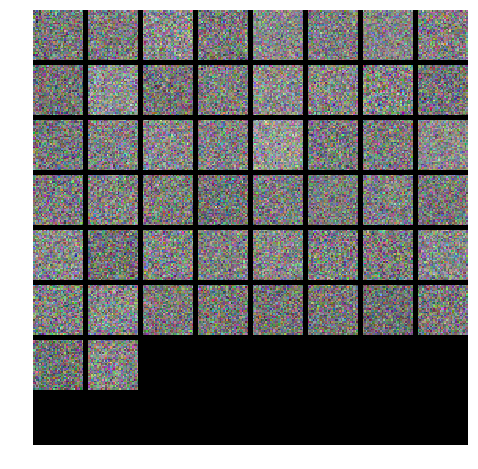

In [26]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [27]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.122


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:1,3

*Your explanation:*1 позволит "расширить кругозор" нашей сети, дать ей вобрать в себя больше различных данных, приблизить распределение фич к распределению фич в "реальном мире", 3 - увеличивает "штраф на сложность" в контексте той или иной метрики(l1 или l2), чтобы коэффициенты модели не были подогнаны под какой-то конкретный пример из тренировочных данных , 
а соответствовали некоему правилу(матрица коэффициентов должна быть разрежена, параметров не должно быть много - в случае l1, или сумма квадратов коэффициентов не должна быть очень большой - в случае l2)